<a href="https://colab.research.google.com/github/TheLeveyBreaks/Foundations-of-Machine-Learning/blob/hw_6/Foundations_of_Machine_Learning_Titanic_Data_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Foundations of Machine Learning Project: Titanic Data Set**

## Background:

On the night of April 15th, 1912, the "unsinkable" RMS Titanic sank after colliding with an iceberg during her main voyage.

Because the White Star Line, the shipping line that opperated the Titanic, wanted to provide unbstructed views for 1st class passengers, the origional design of 64 life boats was cut down to 20 life boats. In total, this could accommodate 1,178 people, a little over half on board the night the Titanic sank.

This fatal mistake resulted in the death of 67.5% of the passengers on the night of the distaster. This number was further exacurbated as only 18 lifeboats were used, and many lifeboats only carried a fraction of their maximum capacity.

There are many variations as to why many life boats were not filled to capacity:
- Some sources claimed that the passengers were afraid of the lifeboat buckling under the weight.
- Others suggested that the crew were following orders to evacuate women and children first.

It is also worth noting that only two lifeboats returned to retrieve survivors, as the other lifeboats feared of being swamped with survivors or being sucked into the Titanic sinking.


The data being used for this project is derived from the Kaggle Data set. It is worth noting in the kaggle dataset, it states that 1502 passangers out of 2224 perished, while other estimates have 1,517 lives lost. From the Kaggle Estimate, this results in 722 survivors while other estimates have about 706 survivors.

For consistency, this project will be using the Kaggle estimate in providing results for this project.







## Project Description:

This project serves answer the question: **What is the likelyhood of a passengers survival?** Given the emergancy protocal taken, and the design choice of limiting lifeboats.

To determine this, this project will leverage variables such as:
- Ticket Class
- Cabin Number
- Sex
- Age
- Siblings/Spouses on board
- Port of Embarkment
- Survived (True/False)

Anticipated outcome (hypothesis): **Women and children in the first class cabins will have a higher survival rate in comparison to their counterparts.**

### Methodology

The model that will be used within this project will be a **Classification Model**.

A classification model will be used is because from the Titanic's design, First Class passengers vicinity to the life boats, along with the emergancy protocal, are excpected to give passengers in specific groups an advantage.

The methodology for this project will take a top-down approach. The analysis, and steps for modeling will be taken in the following order:

1. **Economic Status (Ticket Class & Cabin Number).**
2. **Ratio of Male/Female passengers per economic status bucket.**
3. **Age of passengers**


Below will go into further detail into the reasoning/logic to be implimented for the analysis & model.

1. **Economic Status:**

- As stated above, the reason why the Titanic only had 20 life boats was to not obstruct the views of 1st class passengers. With that being said, the first analysis will be to look at the ticket class of the passengers versus their survivability.

- In addition, to illustrate the placement of the first class passengers relative to the life boats, the cabin number will serve as an additonal layer, and be bucketed with ticket class. Again, this is to better illustrate the time it took passengers to get into the lifeboat.

- **It is important to note that in this project, Economic analysis serves to illustrate passengers distance to the lifeboats.**


2. **Ratio of Male/Female per economic class**

- Given that the ship orders were to evacuate women and children first, within the economic bucket, the next step will be to analyze, and model the gender split between economic class.

3. **Age**
- As stated above (women and children are to be saved first), The ratio between the genders will be analyzed and implimented in the model as well.

4. **Spouse/Sibling Data**
- A further analysis will be executed to analyse passengers traveling with Spouses/Siblings. This element serves as an additional layer to test the hypothesis. This serves to investigate if families were kept together.


### Data Resources

The dataset being used in this project will be the Titanic Dataset from Kaggle (link below)
- Link: https://www.kaggle.com/c/titanic/data

In addition to the kaggle dataset, floor plans relative of the titanic, reflecting the dimentions of cabins, and distance to the lifeboats on the Boat deck will be used in addition to the kaggle dataset. This data set will be constructed manually, with illustration to provided to reflect cabin distance to the lifeboats.
- Link: https://www.encyclopedia-titanica.org/titanic-deckplans/boat-deck.html







## Performance Metrics:

The audience this project's scope are **cruse ship arcitects**, along with **safety officers** for emergancy protocal when disaster strikes (In this case, a ship sinking).

Given the gravity of such situations, the primary metrics of this Machine Learning model is to provide **Precision** of passengers survivalness given the Titanic example.

As noted above, women, and children were given priorty for evacuation. This model serves to provide a precice probability of chance survivability given this emercancy protocal.

Furthermore, since it was decided by the ships designers to not include as many lifeboats so the first class can enjoy the view, this model will also take that into account.

To determine the predictability, and effectiveness of the model, the following metrics will used:

1. The statistical significants of economic status, ratio of male/female (within economic status bucket to-be created) and age from the train vs the test datasets
 - If the model is trained correctly, we should see statistical significants between these variables in both data set as **.95** or **α >= 0.05**
 - The reason that these Stat Sig values are used is because survivability of the passengers is the priority.

2. In addition, the model should give a similar output that is on par with the overall survivability between male/females along with age. The patterns from the train & test datasets should be on par with eachother.

3. Given that this is a classification model, the objective is to give a overall generability of the liklyhood of survival given the protocal, and design choices of the Titanic.

The findings of this Machine Learning Model will provide life saving information to help disasters like the Titanic to be prevented in the future.


## **EDA (Exploratory Data Analysis)**

In this section, we will begin to explore the dataset itself. For this purpose, we will answer the following questions.

1. What was the average family/party size for 1st, 2nd, and 3rd class passengers? What did the family structure look like?
 - In some families, there were nannys to take care of the children. How many nannys were on board?

2. From the answers above, who were the survivors?

3. What was the gender ratio of the survivors?

## Question 1: What was the average family/party size for 1st, 2nd, and 3rd class passengers? What did the family structure look like?
- In some families, there were nannys to take care of the children. How many nannys were on board?



## Step 1 to answer the first question:
How to the Sibsp and Parch columns opperate? How does it tell us about the average party/family size for 1st, 2nd, and 3rd class passengers?

### First, we will begin by importing our data and analyzing the overall scructure of it

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Import visualization, and table libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Import titanic data to be analyzed
titanic_passenger_data_train = pd.read_csv("/content/drive/MyDrive/titanic_data/train.csv")
titanic_passenger_data_test = pd.read_csv("/content/drive/MyDrive/titanic_data/test_edit.csv")

#Union test & training data (In Kaggle, the test and train are split by default)

titanic_passenger_data = pd.concat([titanic_passenger_data_train,titanic_passenger_data_test])

titanic_passenger_data.reset_index(drop=True,inplace=True)

In [3]:
#union joined data
titanic_passenger_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
titanic_passenger_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [5]:
#See the first couple of rows of the data/info
titanic_passenger_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Passengers in the first 5 rows(specificaly, 3rd class passengers) do not have a Cabin NaN.
#### Is this for all 3rd class passengers?

In [6]:
# First, get the total number of passengers by class
titanic_passenger_data['Pclass'].value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

### For the total passenger counts, we have:
- 1st class: **323**
- 2nd class: **277**
- 3rd class: **709**

### Next step, lets see if any of the classes (not just the 3rd class) has any NaN values


In [7]:
#Confirming that the row count matches the sum above (891 rows)
row_count = len(titanic_passenger_data)
print(f'There are {row_count} rows.')

There are 1309 rows.


In [8]:
#Create sub class of df (sub_passenger)
sub_passenger = titanic_passenger_data[['PassengerId','Name','Pclass','Cabin']]
# Group by 'Pclass' and count NaN values in 'Cabin'
nan_counts = sub_passenger.groupby('Pclass')['Cabin'].apply(lambda x: x.isna().sum())

nan_counts

Pclass
1     67
2    254
3    693
Name: Cabin, dtype: int64

In [9]:
# Comparison of NaN vs Non-NaN values

grouped = sub_passenger.groupby('Pclass')['Cabin']

cabin_stats = grouped.agg(
    Total_Count = 'count',
    NaN_Count = lambda x: x.isna().sum()
)

cabin_stats['NaN_Percentage'] = (cabin_stats['NaN_Count'] / (cabin_stats['NaN_Count'] + cabin_stats['Total_Count'])) * 100

print(cabin_stats)


        Total_Count  NaN_Count  NaN_Percentage
Pclass                                        
1               256         67       20.743034
2                23        254       91.696751
3                16        693       97.743300


#### First Class only has a NaN percentage of ***18.5%*** | Second NaN percentage of ***91.3%*** | Third NaN percentage of ***97.5%***

#### From an initial glance, **we have more data on the location of first class passengers as comparison to the rest**.
- We must be mindful of this, as it will be difficult to illustrate the location of 2nd and 3rd class passengers for the analysis



### We will continue by creating a column that will group passengers together (Families/overall passenger party size) with a new column.
1. To do so, we will use the **Parch** column. This column gives us an idea of the party/family relations. The expected output of this column will be as follows:
- A family of 4 will populate the column as follows:
   **[Father Age:|, Mother Age:|, Son Age:|, Daughter: Age]**

- The column will comprise of a string list. We will use this column to group passenger's party on an individual basis.
  - We could group via ticket number. However, for illustrative purposes, having the full party list will help with data manipulation. For example, children with a Parch of 0 are on board with nannies, having a populated list column highlighting that observation will shorted the EDA process.

### But first, we will visualize the average family/party size who were aboard the Titanic
- To do so, we will do EDA on the Parch value analysis and its relation to the Sibsp value.
- This way, we can interpret passenger relations, and group them together.






In [10]:
#Find levels of the overal Parch
sub_parch = titanic_passenger_data[['PassengerId','Pclass','Name','Parch','SibSp']]

#Group by Pclass, and count the Parch within the Pclass group

class_parch_group = sub_parch.groupby(['Pclass','Parch']).size()

class_parch_group

Pclass  Parch
1       0        242
        1         50
        2         27
        3          2
        4          2
2       0        206
        1         43
        2         25
        3          3
3       0        554
        1         77
        2         61
        3          3
        4          4
        5          6
        6          2
        9          2
dtype: int64

####

 #### After EDA of the Parch, the column opperates as follows:
 - Head of the household will have a higher Parch
 - Younger of the household will have a smaller Parch, if they have siblings, they will have a SibSp value of 2 or more.
 - If they are married/traveling with a sibling(if they are older), they will have a SibSp value of 1
 - This can be narrowed down via matching tickets, along wiht the Sibsp column to get an idea of the party size.

 ### Examples are as follows:


 ##### 1. The Futrelles:
 - Had a SibSp value of 1 with 0 Parch.
 - Either married or Brother & Sister (SibSp = 1).
 - No other children (No other passengers named Futrelle)
 - Shared a Cabin & Ticket Number
 - In the Data, **This is an example of a married couple, or older group of siblings, traveling together**

In [11]:
#Example here: the Futrelle's were married because they had a SibSp value of 1, and a Parch of 0.
cabin_c123_passengers = titanic_passenger_data[titanic_passenger_data['Cabin'].str.contains('C123', case=False, na=False)]
cabin_c123_passengers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
137,138,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1,C123,S


 2. The Harper's:
 - One Pair had a ticket value of PC 17572, the other of 248727
 - The PC 17572 Couple had a SibSp of 1 and a Parch of 0
 - The other two had SibSp of 0 and a Parch of 1

 The Ticket starting with PC embarked at a different location. Implying they are not together. In this case, Parch of 1 is reflective that they are traveling together.
 - For the Harpers with a PC ticket, in the data **This is an example of a married couple, or a older group of siblings, traveling together**
 - Fo rthe Harpers with the Non-PC ticket, in the data, **This is an example of a older person (or a chaperone) trabeling with a younger person**

In [12]:
# Harper did NOT have children, they departed at different places, and ticket was different from the other Harper's
Harper_passengers = titanic_passenger_data[titanic_passenger_data['Name'].str.contains('Harper', case=False, na=False)]
Harper_passengers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
645,646,1,1,"Harper, Mr. Henry Sleeper",male,48.0,1,0,PC 17572,76.7292,D33,C
720,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S
848,849,0,2,"Harper, Rev. John",male,28.0,0,1,248727,33.0000,NaN,S


3. The Palssons:
- Mrs.Nils has Parch value of 4, reflecting that she is the head of the household/group.
- She had 3 children and no spouse (giving her a SibSp of 0 and her children a Sibp value of 3)
- All had the same ticket and embarked at the same place
- In the data, this is reflective of a **Single mom/guardian traveling with children**

In [13]:
Palsson_passengers = titanic_passenger_data[titanic_passenger_data['Name'].str.contains('Palsson', case=False, na=False)]
Palsson_passengers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,NaN,S
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.075,NaN,S
374,375,0,3,"Palsson, Miss. Stina Viola",female,3.0,3,1,349909,21.075,NaN,S
567,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.075,NaN,S
1280,1281,0,3,"Palsson, Master. Paul Folke",male,6.0,3,1,349909,21.075,NaN,S


4. The Skoogs:
We see a similar patern that alings with the Findings above
- Mr and Mrs have a Parch of 4 and a SibSp of 1, reflecting that they are married, and both are head of the group/household
- Their Children have a SibSp of 3, reflecting that the group was traveling with their siblings.
- In the Data, this is reflective of a **full family traveling together**

In [14]:
Skoog_passengers = titanic_passenger_data[titanic_passenger_data['Name'].str.contains('Skoog', case=False, na=False)]
Skoog_passengers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
63,64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9,NaN,S
167,168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,347088,27.9,NaN,S
360,361,0,3,"Skoog, Mr. Wilhelm",male,40.0,1,4,347088,27.9,NaN,S
634,635,0,3,"Skoog, Miss. Mabel",female,9.0,3,2,347088,27.9,NaN,S
642,643,0,3,"Skoog, Miss. Margit Elizabeth",female,2.0,3,2,347088,27.9,NaN,S
819,820,0,3,"Skoog, Master. Karl Thorsten",male,10.0,3,2,347088,27.9,NaN,S


The above tables are to simply give an illustration in effort to visualize how the SibSp and Parch values relate, and illustrate passenger relations.

Below is a distribution of Parch vs age distribution

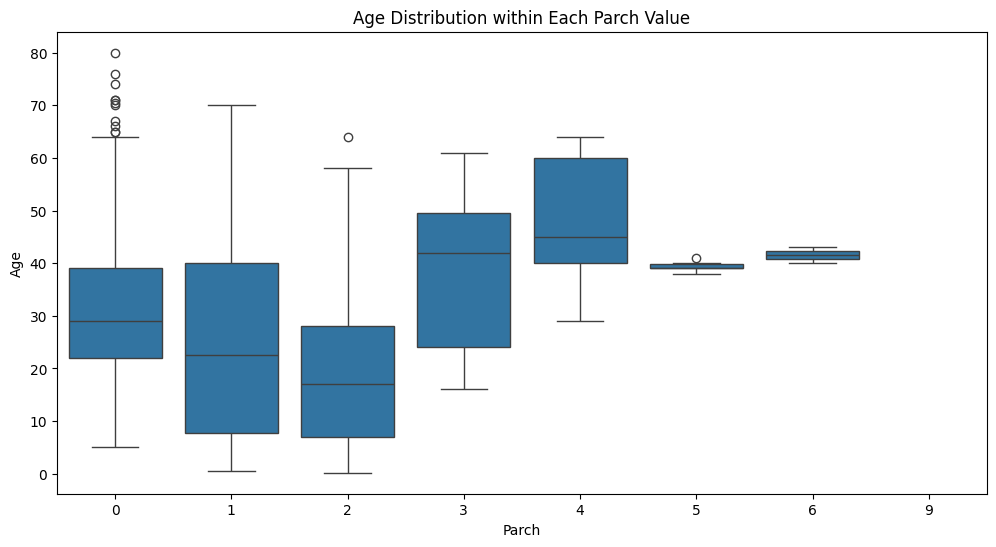

In [15]:
parch_age = titanic_passenger_data[['Parch','Age']]


plt.figure(figsize=(12, 6))
sns.boxplot(x='Parch', y='Age', data=parch_age)
plt.title('Age Distribution within Each Parch Value')
plt.xlabel('Parch')
plt.ylabel('Age')
plt.show()


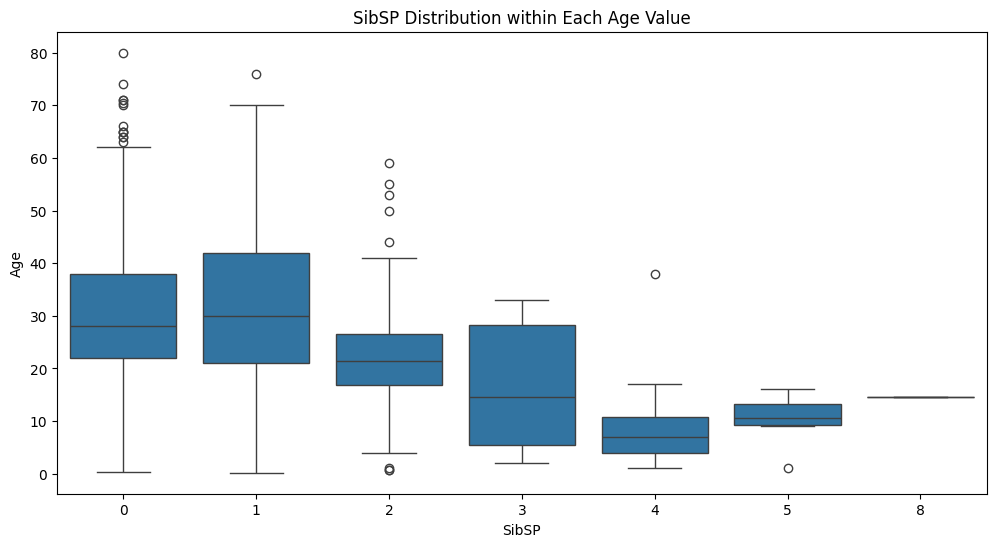

In [16]:
SibSp_age = titanic_passenger_data[['SibSp','Age']]


plt.figure(figsize=(12, 6))
sns.boxplot(x='SibSp', y='Age', data=SibSp_age)
plt.title('SibSP Distribution within Each Age Value')
plt.xlabel('SibSP')
plt.ylabel('Age')
plt.show()

#### **Parch Findings**:
- The age distribution for Parch = 1 is wide, with an average being in the early 20's, while Parch 2 has an average of being below 20.
- This is in paralell with our Harper example above
- As the Parch value goes higher, the age is older. Reflecting the head of households (Mothers, Fathers, Guardians).

#### **SibSp Findings**:
- We notice a lower age distribution for a SibSp value of >= 3, reflecting that within this bucket, this is most likely reflective of passengers traveling with siblings/younger siblings.


#### **Finding Conclusion:** Parch and SibSp are inverse of eachother. A higher Parch most likely reflects a passenger who is a parent, or guardian of another. Higher SibSp value is reflective of passengers traveling with siblings as they tend to be younger.

#### After having these definitions, and understand how both the Parch and SibSp columns operate, we can plot the data and see a general idea of Parch values respective to passenger class.

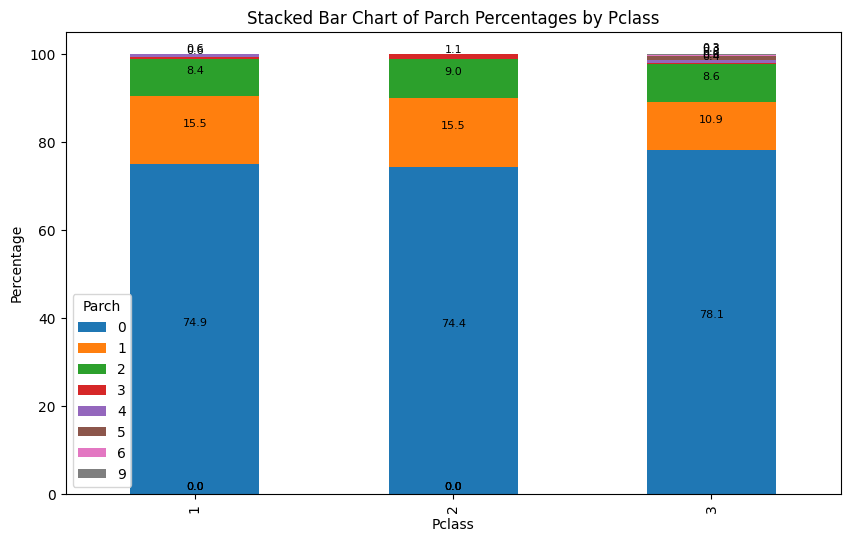

In [17]:
#Ploting the data

parch_chart = class_parch_group.reset_index(name = 'Count')

pivot_parch_chart = parch_chart.pivot(index='Pclass', columns='Parch', values='Count').fillna(0)

percentage_df = pivot_parch_chart.div(pivot_parch_chart.sum(axis=1), axis=0) * 100




plt.figure(figsize=(10, 6))
bar_plot = percentage_df.plot(kind='bar',stacked = True, ax=plt.gca())
for bar in bar_plot.patches:
    bar_plot.annotate(format(bar.get_height(), '.1f'),
                      (bar.get_x() + bar.get_width() / 2,
                       bar.get_y() + bar.get_height() / 2),
                      ha='center', va='center',
                      size=8, xytext=(0, 5),
                      textcoords='offset points')

plt.title('Stacked Bar Chart of Parch Percentages by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Percentage')
plt.legend(title='Parch')
plt.show()


#### From the data above, we can have the following findings (Generalizations):
1. In all classes, there was a huge share of passengers with a Parch of 0
- This could be reflective of couples/older age siblings traveling together
- However, per the data dictionary, Parch of 0 **Also includes children traveling with nannies.** The illustration does not take this into account.

2. The second most populous group was with a Parch of 1.
- This can be reflective of children traveling with a chaperone **or** a single adult traveling with children (non-nanny) hence the grater variation within the distribution graph.

3. Parches with that are >= 3 indicate that these are older passengers, and are traveling with children, step children, or step brother/sister.

#### We will confirm these findings by creating a new column reflective of a a passenger's party list like so:
- **[Father,Age:| Mother, Age| Son, Age:| Daughter, Age]**
- Above is an example, from Left to right, the oldest of the party will be populated first



In [18]:
#Function to create Party List:
def passenger_party_list(group):
  sorted_group = group.sort_values(by='Age', ascending = False)
  party_list = '|'.join([f"{row['Name']} Age: {row['Age']}" for _, row in sorted_group.iterrows()])
  return party_list

In [19]:
#Apply the fucntion as a column
party_series = titanic_passenger_data.groupby('Ticket').apply(passenger_party_list)

titanic_passenger_data['Party'] = titanic_passenger_data['Ticket'].apply(lambda x: party_series.get(x, ''))

titanic_passenger_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Party
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"Braund, Mr. Owen Harris Age: 22.0"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"Cumings, Mr. John Bradley Age: 39.0|Cumings, M..."
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"Heikkinen, Miss. Laina Age: 26.0"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"Futrelle, Mr. Jacques Heath Age: 37.0|Futrelle..."
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"Allen, Mr. William Henry Age: 35.0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,"Spector, Mr. Woolf Age: nan"
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,"Oliva y Ocana, Dona. Fermina Age: 39.0|Penasco..."
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,"Saether, Mr. Simon Sivertsen Age: 38.5"
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,"Ware, Mr. Frederick Age: nan"


#### We will use the "Party" Column to count each individuals in the list, and create a new column called "Party Size"

In [20]:
titanic_passenger_data['Party_Size'] = titanic_passenger_data['Party'].apply(lambda x: x.count('|') + 1)

titanic_passenger_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Party,Party_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"Braund, Mr. Owen Harris Age: 22.0",1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"Cumings, Mr. John Bradley Age: 39.0|Cumings, M...",2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"Heikkinen, Miss. Laina Age: 26.0",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"Futrelle, Mr. Jacques Heath Age: 37.0|Futrelle...",2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"Allen, Mr. William Henry Age: 35.0",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,"Spector, Mr. Woolf Age: nan",1
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,"Oliva y Ocana, Dona. Fermina Age: 39.0|Penasco...",3
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,"Saether, Mr. Simon Sivertsen Age: 38.5",1
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,"Ware, Mr. Frederick Age: nan",1


#### Now we can easily see which children had a Parch of 0 and were accompanied by a nanny by:
- Who had a party size >= 2
- Age is <15 (This is a starting point)
- Had a Perch of 0

In [21]:
nanny_data = titanic_passenger_data[(titanic_passenger_data['Parch'] == 0) &
                                      (titanic_passenger_data['Party_Size'] >= 2)&
                                      (titanic_passenger_data['Age'] <15)]
nanny_data

# Ticket number 364516 was accompanied by a nanny, ticket number 2699 was also accompanied by a nanny.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Party,Party_Size
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,"Nasser, Mr. Nicholas Age: 32.5|Nasser, Mrs. Ni...",2
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C,"Nicola-Yarred, Miss. Jamila Age: 14.0|Nicola-Y...",2
111,112,0,3,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,"Zabour, Miss. Hileni Age: 14.5|Zabour, Miss. T...",2
125,126,1,3,"Nicola-Yarred, Master. Elias",male,12.0,1,0,2651,11.2417,NaN,C,"Nicola-Yarred, Miss. Jamila Age: 14.0|Nicola-Y...",2
731,732,0,3,"Hassan, Mr. Houssein G N",male,11.0,0,0,2699,18.7875,NaN,C,"Albimona, Mr. Nassef Cassem Age: 26.0|Hassan, ...",2
777,778,1,3,"Emanuel, Miss. Virginia Ethel",female,5.0,0,0,364516,12.4750,NaN,S,"Dowdell, Miss. Elizabeth Age: 30.0|Emanuel, Mi...",2
1011,1012,1,2,"Watt, Miss. Bertha J",female,12.0,0,0,C.A. 33595,15.7500,NaN,S,"Watt, Mrs. James (Elizabeth ""Bessie"" Inglis Mi...",2
1121,1122,0,2,"Sweet, Mr. George Frederick",male,14.0,0,0,220845,65.0000,NaN,S,"Herman, Mr. Samuel Age: 49.0|Herman, Mrs. Samu...",5


#### As we see, ticket numbers **36516** and **2699** were most likely traveling with nannies due to the following reasons:
- Last names do not match.
- Bigger age gap within the party.
- Parties are >= 2

#### Step 1 is completed. Now we will see by class, what was the average party size.

<ipython-input-22-bd09e1ee709f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_party_size['Party_Size'] = class_party_size['Party_Size'].astype('category')


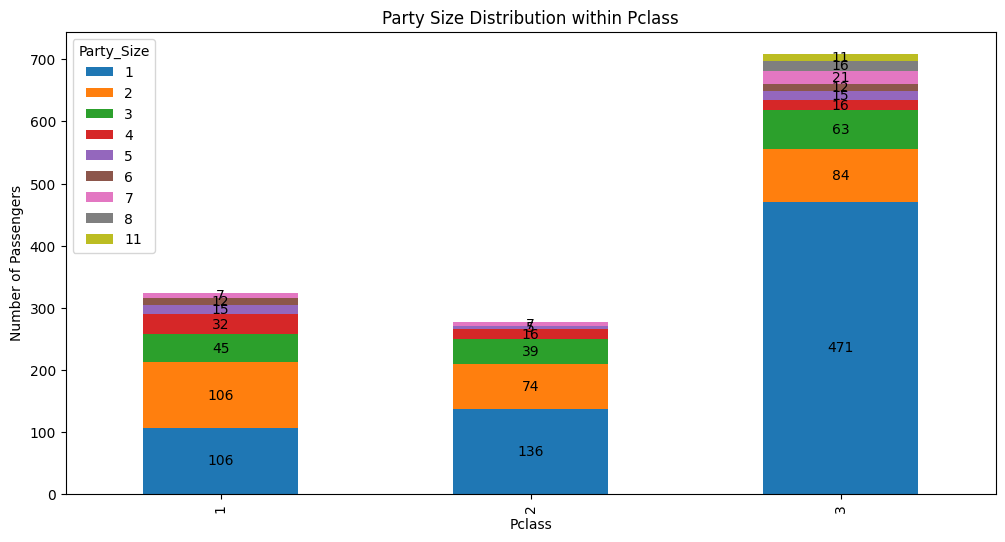

In [22]:
class_party_size = titanic_passenger_data[['Pclass', 'Party_Size']]

class_party_size['Party_Size'] = class_party_size['Party_Size'].astype('category')

grouped_data = class_party_size.groupby(['Pclass', 'Party_Size']).size().unstack(fill_value=0)


ax = grouped_data.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Party Size Distribution within Pclass')
plt.xlabel('Pclass')
plt.ylabel('Number of Passengers')

# Count Labels for Graph
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:  # Only add text if there is a count
        ax.text(x + width/2,
                y + height/2,
                int(height),
                horizontalalignment='center',
                verticalalignment='center')

plt.show()

## **Question 1 Answer**:
- First class passengers had a lower party size, second and third had a higher share of larger party size.
- For nannies, there were two nannies on board who accompanied children. This should not impact our data too much

#### **Question 2: Who were the survivors?**

##### By having the party size, we can identify on a party size level, who were the survivors.
- For this, we will bucket them by class, and create another column that will subtract from the Party column of who perished

In [23]:
#Create function that only makes a list of those part members who survived
def passenger_party_list_survived_only(group):
    sorted_group = group.sort_values(by='Age', ascending=False)
    # Joining only the names of passengers who survived
    party_list_survived = '|'.join([f"{row['Name']} Age: {row['Age']}"
                                    for _, row in sorted_group.iterrows()
                                    if row['Survived'] == 1])
    return party_list_survived


In [24]:
#Apply the fucntion as a new column
party_survived_series = titanic_passenger_data.groupby('Ticket').apply(passenger_party_list_survived_only)

titanic_passenger_data['Party_Survived'] = titanic_passenger_data['Ticket'].apply(lambda x: party_survived_series.get(x, ''))

titanic_passenger_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Party,Party_Size,Party_Survived
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"Braund, Mr. Owen Harris Age: 22.0",1,
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"Cumings, Mr. John Bradley Age: 39.0|Cumings, M...",2,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"Heikkinen, Miss. Laina Age: 26.0",1,"Heikkinen, Miss. Laina Age: 26.0"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"Futrelle, Mr. Jacques Heath Age: 37.0|Futrelle...",2,"Futrelle, Mrs. Jacques Heath (Lily May Peel) A..."
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"Allen, Mr. William Henry Age: 35.0",1,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,"Spector, Mr. Woolf Age: nan",1,
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,"Oliva y Ocana, Dona. Fermina Age: 39.0|Penasco...",3,"Oliva y Ocana, Dona. Fermina Age: 39.0|Penasco..."
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,"Saether, Mr. Simon Sivertsen Age: 38.5",1,
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,"Ware, Mr. Frederick Age: nan",1,


In [25]:
#Make another column called Party_Size_Survived
def count_survived_members(party_survived):
    # Count the number of survivors in the party
    if pd.isna(party_survived) or party_survived == '':
        return 0
    else:
        return len(party_survived.split('|'))

# Assuming titanic_passenger_data is your DataFrame and 'Party_Survived' is your list column
titanic_passenger_data['Party_Size_Survived'] = titanic_passenger_data['Party_Survived'].apply(count_survived_members)

titanic_passenger_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Party,Party_Size,Party_Survived,Party_Size_Survived
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"Braund, Mr. Owen Harris Age: 22.0",1,,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"Cumings, Mr. John Bradley Age: 39.0|Cumings, M...",2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"Heikkinen, Miss. Laina Age: 26.0",1,"Heikkinen, Miss. Laina Age: 26.0",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"Futrelle, Mr. Jacques Heath Age: 37.0|Futrelle...",2,"Futrelle, Mrs. Jacques Heath (Lily May Peel) A...",1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"Allen, Mr. William Henry Age: 35.0",1,,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,"Spector, Mr. Woolf Age: nan",1,,0
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,"Oliva y Ocana, Dona. Fermina Age: 39.0|Penasco...",3,"Oliva y Ocana, Dona. Fermina Age: 39.0|Penasco...",2
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,"Saether, Mr. Simon Sivertsen Age: 38.5",1,,0
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,"Ware, Mr. Frederick Age: nan",1,,0


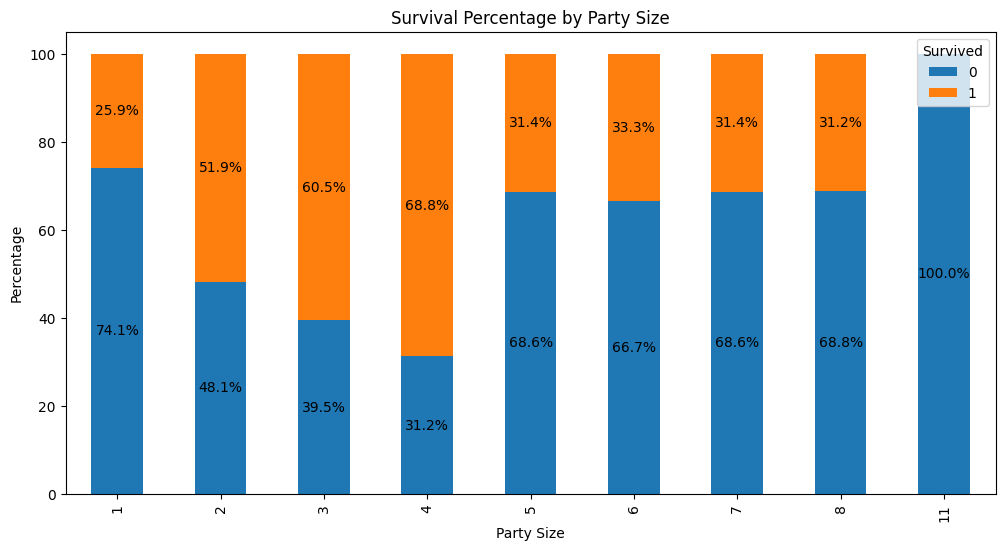

In [26]:
#Plot Data by party size who survived & did not survive:

grouped = titanic_passenger_data.groupby(['Party_Size', 'Survived']).size().unstack(fill_value=0)

total_passengers = grouped.sum(axis=1)

# Calculate the percentage
grouped_percentage = grouped.div(total_passengers, axis=0) * 100

#Plot Logic
ax = grouped_percentage.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Survival Percentage by Party Size')
plt.xlabel('Party Size')
plt.ylabel('Percentage')

# Add percentages:
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:  # Only add text if there is a count
        ax.text(x + width/2,
                y + height/2,
                f'{height:.1f}%',
                horizontalalignment='center',
                verticalalignment='center')

plt.show()

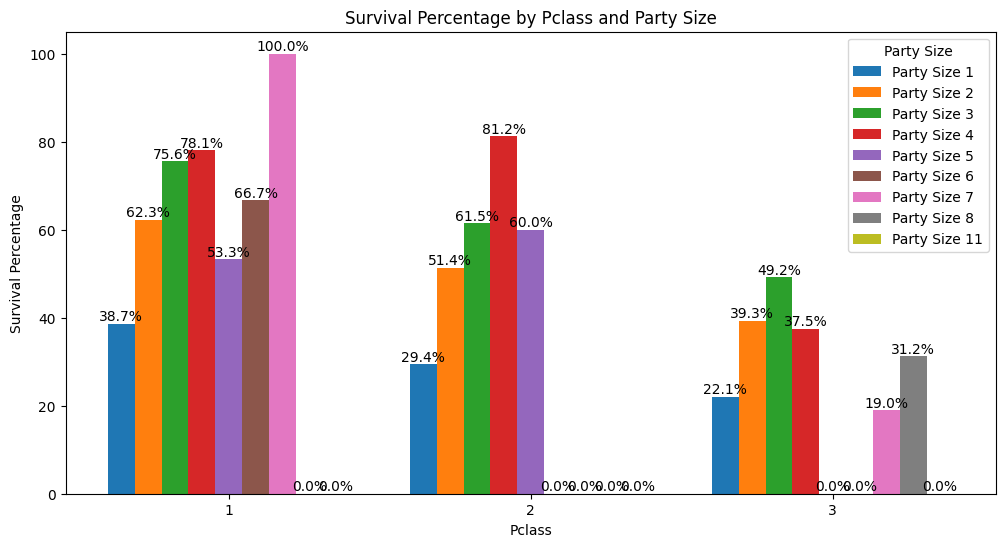

In [27]:
# Group by Pclass, Party_Size, and Survived
grouped = titanic_passenger_data.groupby(['Pclass', 'Party_Size', 'Survived']).size().unstack(fill_value=0)

# Calculate the total passengers by Pclass and Party_Size
total_passengers = grouped.sum(axis=1)

# Calculate the percentage
grouped_percentage = grouped.div(total_passengers, axis=0) * 100

# Get unique values for Pclass and Party_Size
pclasses = grouped_percentage.index.get_level_values(0).unique()
party_sizes = grouped_percentage.index.get_level_values(1).unique()


fig, ax = plt.subplots(figsize=(12, 6))

# Width of the bars
width = 0.8 / len(party_sizes)

# The x location groups
ind = np.arange(len(pclasses))

for i, size in enumerate(party_sizes):
    # Extract percentages for this party size across all Pclasses
    percentages = [grouped_percentage.loc[(cls, size), 1] if (cls, size) in grouped_percentage.index else 0 for cls in pclasses]

    # Set the position for the bar for this party size
    bar_positions = ind - (0.8 - width) / 2 + i * width

    # Plot
    ax.bar(bar_positions, percentages, width, label=f'Party Size {size}')

    # Adding value labels on top of each bar
    for j, cls in enumerate(pclasses):
        height = percentages[j]
        ax.text(bar_positions[j], height, f'{height:.1f}%', ha='center', va='bottom')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Pclass')
ax.set_ylabel('Survival Percentage')
ax.set_title('Survival Percentage by Pclass and Party Size')
ax.set_xticks(ind)
ax.set_xticklabels(pclasses)
ax.legend(title='Party Size')

plt.show()

#### **NOTE**:
- **1st Class only goes up to party size 4**
- **2nd Class only goes up to party size 5**
- **3rd Class goes up to party size 7**

## **Question 2 Answer**:
- **Party sizes of 3 had an overall higher percentage in surviving. Party size 3 or greater has a dramatic decrease in survivability**
- First Class passengers clearly had an advantage regardless of party size when compaired to second and third class


## **Question 3: What was the gender by class of the survivors?**
- Below is a simple visualization of the ratio of survivors by class, followed by age group

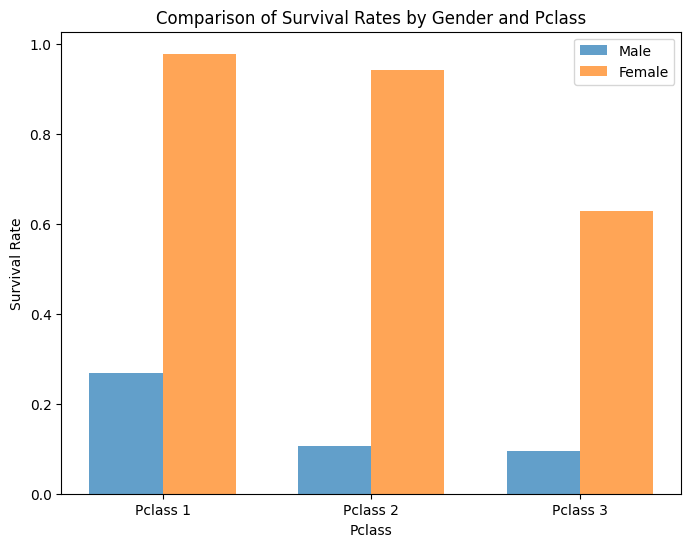

In [28]:
survival_rates = titanic_passenger_data.groupby(['Pclass', 'Sex'])['Survived'].mean().unstack()

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Prepare data for plotting
pclasses = survival_rates.index.unique()
bar_width = 0.35
indices = np.arange(len(pclasses))

# Plotting
male_rates = survival_rates['male']
female_rates = survival_rates['female']

# Male bar positions
male_positions = indices - bar_width / 2

# Female bar positions
female_positions = indices + bar_width / 2

# Plot male and female survival rates
ax.bar(male_positions, male_rates, bar_width, label='Male', alpha=0.7)
ax.bar(female_positions, female_rates, bar_width, label='Female', alpha=0.7)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Pclass')
ax.set_ylabel('Survival Rate')
ax.set_title('Comparison of Survival Rates by Gender and Pclass')
ax.set_xticks(indices)
ax.set_xticklabels(['Pclass ' + str(cls) for cls in pclasses])
ax.legend()

plt.show()

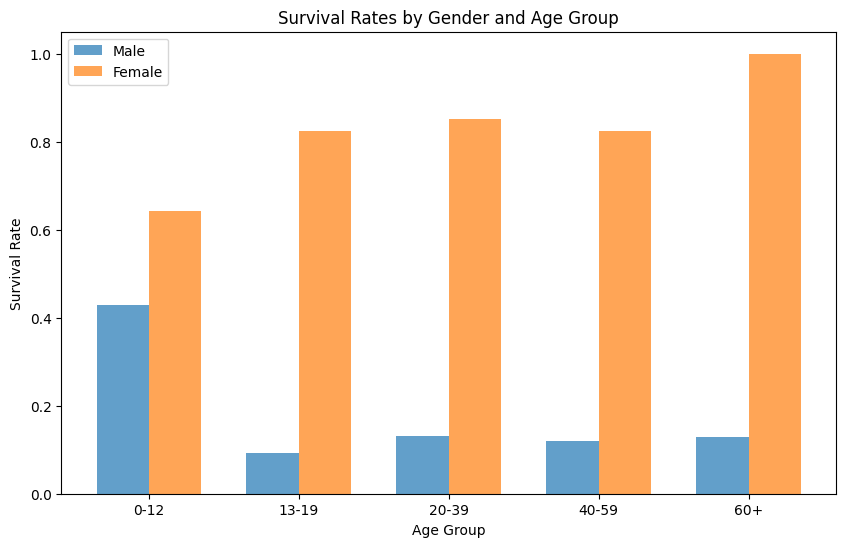

In [29]:
bins = [0, 12, 19, 39, 59, np.inf]
labels = ['0-12', '13-19', '20-39', '40-59', '60+']
titanic_passenger_data['Age_Group'] = pd.cut(titanic_passenger_data['Age'], bins=bins, labels=labels, right=False)

# Calculate survival rates by gender and age group
survival_rates = titanic_passenger_data.groupby(['Age_Group', 'Sex'])['Survived'].mean().unstack()

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Prepare data for plotting
age_groups = survival_rates.index.unique()
bar_width = 0.35
indices = np.arange(len(age_groups))

# Plotting
male_rates = survival_rates['male']
female_rates = survival_rates['female']

# Male bar positions
male_positions = indices - bar_width / 2

# Female bar positions
female_positions = indices + bar_width / 2

# Plot male and female survival rates
ax.bar(male_positions, male_rates, bar_width, label='Male', alpha=0.7)
ax.bar(female_positions, female_rates, bar_width, label='Female', alpha=0.7)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Age Group')
ax.set_ylabel('Survival Rate')
ax.set_title('Survival Rates by Gender and Age Group')
ax.set_xticks(indices)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

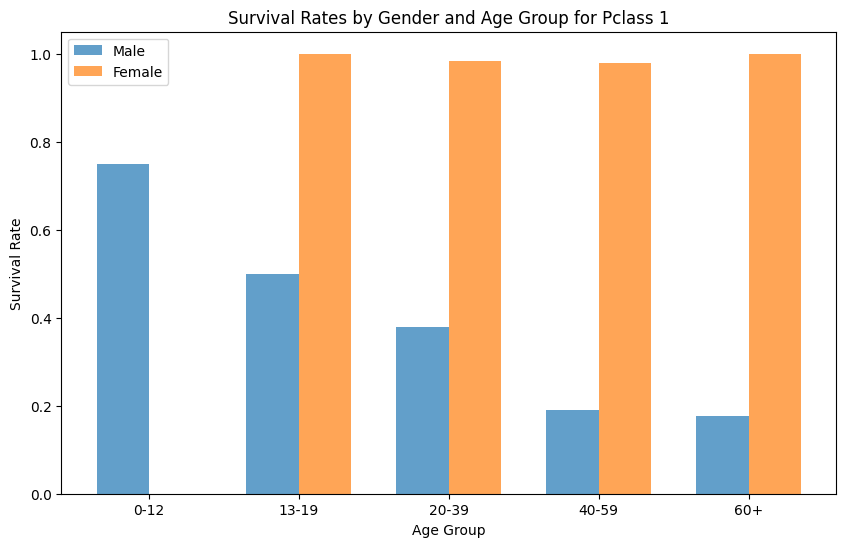

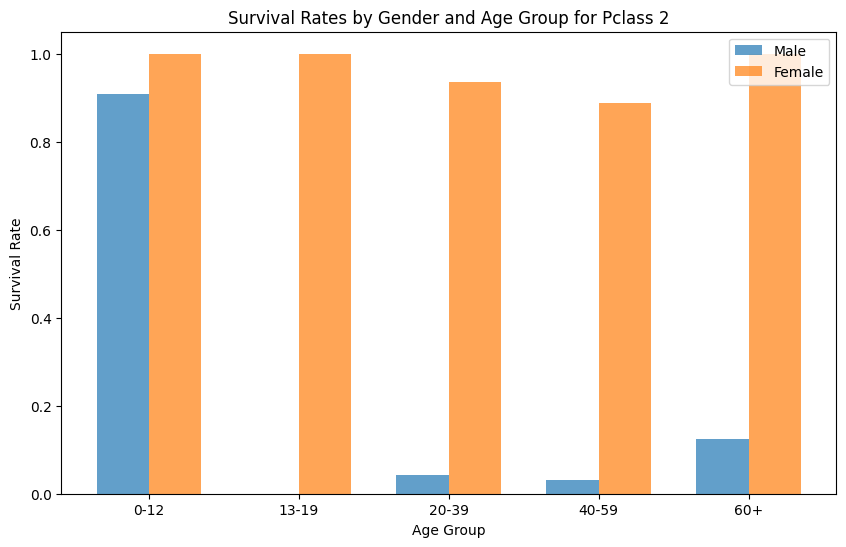

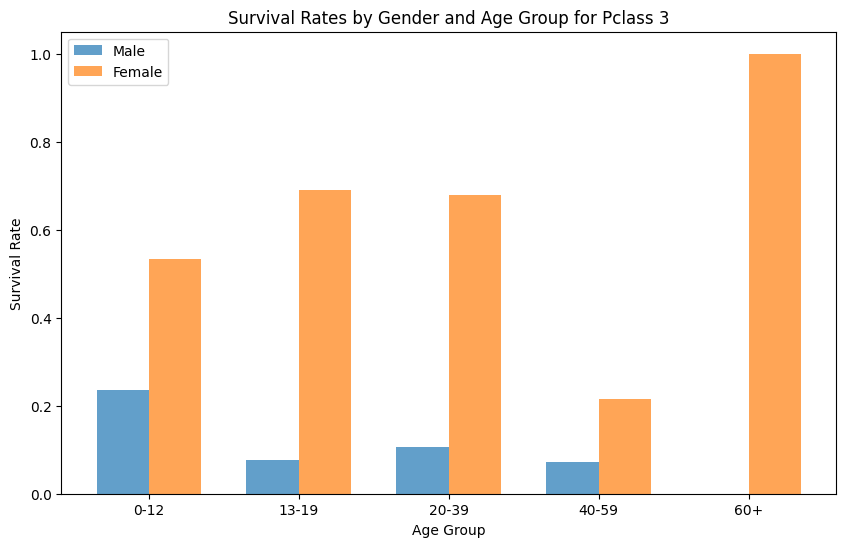

In [30]:
#Make age bins for graph
bins = [0, 12, 19, 39, 59, np.inf]
labels = ['0-12', '13-19', '20-39', '40-59', '60+']
titanic_passenger_data['Age_Group'] = pd.cut(titanic_passenger_data['Age'], bins=bins, labels=labels, right=False)

pclasses = sorted(titanic_passenger_data['Pclass'].unique())

# Use a for loop to create multiple graphs
for pclass in pclasses:
    # Filter data by Pclass
    data_filtered = titanic_passenger_data[titanic_passenger_data['Pclass'] == pclass]

    # Calculate survival rates by gender and age group
    survival_rates = data_filtered.groupby(['Age_Group', 'Sex'])['Survived'].mean().unstack()

    # Create figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))

    # Prepare data for plotting
    age_groups = survival_rates.index.unique()
    bar_width = 0.35
    indices = np.arange(len(age_groups))

    male_rates = survival_rates['male']
    female_rates = survival_rates['female']

    # Male bar positions
    male_positions = indices - bar_width / 2

    # Female bar positions
    female_positions = indices + bar_width / 2

    # Plot male and female survival rates
    ax.bar(male_positions, male_rates, bar_width, label='Male', alpha=0.7)
    ax.bar(female_positions, female_rates, bar_width, label='Female', alpha=0.7)

    # labels.
    ax.set_xlabel('Age Group')
    ax.set_ylabel('Survival Rate')
    ax.set_title(f'Survival Rates by Gender and Age Group for Pclass {pclass}')
    ax.set_xticks(indices)
    ax.set_xticklabels(labels)
    ax.legend()

    plt.show()

## **Question 3 Answer**:
- Across all classes, females and young children had the higher chance of survivability, hence the policy of "women and children first".
- Out of the males, 1st class males had a much higher (but still low) survival rate (overall).
- We still see a drop off in survivability for 3rd class passengers.


## Train Test Split

As we can see from the illustrations above, male survivability drops off significanly outside of first class. This is further illustrated via the class and party side comparison above.

With that being said, by default, the model will put first class, and female first class, on a higher likelyhood of survivability.

Even though this is true, given the trends, we run the risk of making our model extramly biased towards women in the first class. Due to this, the train test split in this case will be **25%** Test, and **75%** Train.
- Furthermore, we will segment the data by class, to ensure we have a proper balance between the test, and train datasets.



## Intital Pipeline
The pipeline will have a heavy focous on categorical values, given the diversity of passenger parties onboard the titanic. The numerical value that will be of focous will be the age, total party members, and party members survive.

- Categorical Values (To be created as new binary columns via column transformer):
 - Traveling with Only Spouse
 - Traveling with Spouse, and Children
 - is_female
 - is_child
 - has_title
 - Deck (split by class)

 With these binary columns, we will have an additional layer of information regarding a passengers party.

 For the above categorical values, the class of these passengers will also be considered.

- Numerical Values:
  - Age
  - Party Size

Since we will remove the variable "Survived" when we execute the train and test split, implimenting both party size and party sized survived will give help enable weight given a party's size, gender ratio, and class. The purpose of this is to maintain this traceability as we execute the train/test split.

  



## Model fitting and evaluation (assumptions):
 1. With these features, the model will have a tendency to favor women in the 1st class survivors. However, given the "women and children first" protocal of the titanic, and the vicinity of first class passengers to the life boats, this seems reasonable with the outcome.
 2. Given the nature of the EDA, and the model to-be created, the additional catagorical features above will enable us to make "cuts" within the data in effort to provide an explenation of causality in the model's performance.
 3. Regarding the numerical values, I believe that both party size and party_size_survived will play a major roll in determining the models performance. As mentioned above, even though for the train/test split we will have to remove the surivial column (in effort to not pollute the data) these two Numerical features will help in providing extra leverage in the event we need to adjust the model.



In [31]:
#import machine learning models for future pipeline development
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer, StandardScaler
from sklearn import config_context
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import set_config



In [32]:
titanic_passenger_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Party,Party_Size,Party_Survived,Party_Size_Survived,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"Braund, Mr. Owen Harris Age: 22.0",1,,0,20-39
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"Cumings, Mr. John Bradley Age: 39.0|Cumings, M...",2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,20-39
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"Heikkinen, Miss. Laina Age: 26.0",1,"Heikkinen, Miss. Laina Age: 26.0",1,20-39
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"Futrelle, Mr. Jacques Heath Age: 37.0|Futrelle...",2,"Futrelle, Mrs. Jacques Heath (Lily May Peel) A...",1,20-39
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"Allen, Mr. William Henry Age: 35.0",1,,0,20-39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,"Spector, Mr. Woolf Age: nan",1,,0,NaN
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,"Oliva y Ocana, Dona. Fermina Age: 39.0|Penasco...",3,"Oliva y Ocana, Dona. Fermina Age: 39.0|Penasco...",2,40-59
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,"Saether, Mr. Simon Sivertsen Age: 38.5",1,,0,20-39
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,"Ware, Mr. Frederick Age: nan",1,,0,NaN


### List the average age per class

In [33]:
#For reference: the mean, median and mode of each class

grouped_by_class = titanic_passenger_data.groupby('Pclass')

# Calculate mean, median, and mode for numeric columns by class
stats_by_class = grouped_by_class.agg({
    'Age': ['mean', 'median', lambda x: x.mode().iloc[0]],
    'Fare': ['mean', 'median', lambda x: x.mode().iloc[0]]
})

# Rename the lambda functions for clarity
stats_by_class.columns = ['Age Mean', 'Age Median', 'Age Mode', 'Fare Mean', 'Fare Median', 'Fare Mode']

# Display the DataFrame
print(stats_by_class)

         Age Mean  Age Median  Age Mode  Fare Mean  Fare Median  Fare Mode
Pclass                                                                    
1       39.159930        39.0      36.0  87.508992      60.0000      26.55
2       29.506705        29.0      24.0  21.179196      15.0458      13.00
3       24.816367        24.0      22.0  13.302889       8.0500       8.05


## Feature Engineering Part 1: Create is_female, is_child, and Deck (if available) columns

### As per the EDA above, it will be interesting to see if the passenger was female, or a child.

In [34]:
#labels regarding age groups, make child column ['0-12', '13-19', '20-39', '40-59', '60+']
#Is Female
titanic_passenger_data['is_female'] = titanic_passenger_data['Sex'] == 'female'
#Is Child
titanic_passenger_data['is_child'] = titanic_passenger_data['Age']< 13
# Extract the left-most character from the 'Cabin' column and handle NaN values
titanic_passenger_data['Deck'] = titanic_passenger_data['Cabin'].str[0].fillna('N')
# Create a new column indicating both Deck location and Passenger class
titanic_passenger_data['Deck_Pclass'] = titanic_passenger_data['Deck'] + ': ' + titanic_passenger_data['Pclass'].astype(str) + ' Class'

## Feature Engineering Part 2: Create a column if a passenger had a specific Title

In [35]:
#Title
import re

def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

titanic_passenger_data['Title'] = titanic_passenger_data['Name'].apply(get_title)

titanic_passenger_data['Title'].unique()


array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [36]:
# List of titles to check for
special_titles = ['Don', 'Dona', 'Lady', 'Sir', 'Countess', 'Jonkheer', 'Master', 'Rev', 'Major', 'Col', 'Capt', 'Dr']

def has_special_title(title):
    return any(special_title in title for special_title in special_titles)

titanic_passenger_data['Has_Special_Title'] = titanic_passenger_data['Title'].apply(has_special_title)


In [37]:
#Count of has special title.
titanic_passenger_data['Has_Special_Title'].value_counts()

False    1219
True       90
Name: Has_Special_Title, dtype: int64

In [38]:
# Calculate the average age for each party size
average_age_by_party = titanic_passenger_data.groupby('Party')['Age'].mean()

# Map the average age values back to the original DataFrame based on party size
titanic_passenger_data['Average_Age'] = titanic_passenger_data['Party'].map(average_age_by_party)

## Feature Engineering Part 3: Create columns the that the passengers stayed in (Deck N if there was no deck in the data).

### This was derived from the Cabin number, and divided by class per columns (example: If someone was first Class on Deck A. Deck_Pclass_A: 1 Class will = 1, else 0)

In [39]:
# Perform one-hot encoding on the 'Embarked' column
embarked_dummies = pd.get_dummies(titanic_passenger_data['Embarked'], prefix='Embarked')

# Perform one-hot encoding on the 'Deck_Pclass' column
deck_pclass_dummies = pd.get_dummies(titanic_passenger_data['Deck_Pclass'], prefix='Deck_Pclass')

# Concatenate the one-hot encoded columns with the original DataFrame
titanic_passenger_data_encoded = pd.concat([titanic_passenger_data, embarked_dummies, deck_pclass_dummies], axis=1)

# Drop the original 'Embarked' and 'Deck_Pclass' columns as they're no longer needed after one-hot encoding
titanic_passenger_data_encoded.drop(['Embarked', 'Deck_Pclass'], axis=1, inplace=True)

In [40]:
df = titanic_passenger_data_encoded

### Final list of columns

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   PassengerId             1309 non-null   int64   
 1   Survived                1309 non-null   int64   
 2   Pclass                  1309 non-null   int64   
 3   Name                    1309 non-null   object  
 4   Sex                     1309 non-null   object  
 5   Age                     1046 non-null   float64 
 6   SibSp                   1309 non-null   int64   
 7   Parch                   1309 non-null   int64   
 8   Ticket                  1309 non-null   object  
 9   Fare                    1308 non-null   float64 
 10  Cabin                   295 non-null    object  
 11  Party                   1309 non-null   object  
 12  Party_Size              1309 non-null   int64   
 13  Party_Survived          1309 non-null   object  
 14  Party_Size_Survived     

In [42]:
df = titanic_passenger_data_encoded

## ML Data Pipeline

In [43]:
# train model (strategy = 'mean')
# Separating features and target ('Survived')
x = df[['is_female','Fare','Age','Party_Size','SibSp','Parch','Has_Special_Title','Deck_Pclass_A: 1 Class','Deck_Pclass_B: 1 Class','Deck_Pclass_C: 1 Class'
,'Deck_Pclass_D: 1 Class','Deck_Pclass_D: 2 Class','Deck_Pclass_E: 1 Class','Deck_Pclass_E: 2 Class','Deck_Pclass_E: 3 Class','Deck_Pclass_F: 2 Class'
,'Deck_Pclass_F: 3 Class','Deck_Pclass_G: 3 Class','Deck_Pclass_N: 1 Class','Deck_Pclass_N: 2 Class','Deck_Pclass_N: 3 Class','Deck_Pclass_T: 1 Class']]
y = df['Survived']


# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Creating some sample pipelines
dt_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(random_state=42))
])
rf_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

svc_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('classifier', SVC(random_state=42))
])
kn_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier(n_neighbors=6))
])
gb_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('classifier', GradientBoostingClassifier(random_state=42))
])
nb_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('classifier', GaussianNB())
])
mlp_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('classifier', MLPClassifier(random_state=42))
])


In [44]:
# Training the model
dt_pipeline.fit(x_train, y_train)
# Making predictions
dt_y_pred = dt_pipeline.predict(x_test)

# Training the model
rf_pipeline.fit(x_train, y_train)
# Making predictions
rf_y_pred = rf_pipeline.predict(x_test)

# Training the model
svc_pipeline.fit(x_train, y_train)
# Making predictions
svc_y_pred = svc_pipeline.predict(x_test)

# Training the model
kn_pipeline.fit(x_train, y_train)
# Making predictions
kn_y_pred = kn_pipeline.predict(x_test)

# Training the model
gb_pipeline.fit(x_train, y_train)
# Making predictions
gb_y_pred = gb_pipeline.predict(x_test)

# Training the model
nb_pipeline.fit(x_train, y_train)
# Making predictions
nb_y_pred = nb_pipeline.predict(x_test)

# Training the model
mlp_pipeline.fit(x_train, y_train)
# Making predictions
mlp_y_pred = mlp_pipeline.predict(x_test)


def evaluate_model_performance(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print("MODEL: " + model_name)
    print(f"Model accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print("")

evaluate_model_performance(y_test, dt_y_pred, "DecisionTreeClassifier")
evaluate_model_performance(y_test, rf_y_pred, "RandomForestClassifier")
evaluate_model_performance(y_test, svc_y_pred, "SVC")
evaluate_model_performance(y_test, kn_y_pred, "KNeighborsClassifier")
evaluate_model_performance(y_test, gb_y_pred, "GradientBoostingClassifier")
evaluate_model_performance(y_test, nb_y_pred, "GaussianNB")
evaluate_model_performance(y_test, mlp_y_pred, "MLPClassifier")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MODEL: DecisionTreeClassifier
Model accuracy: 0.79
Precision: 0.71
Recall: 0.78
F1 Score: 0.74

MODEL: RandomForestClassifier
Model accuracy: 0.86
Precision: 0.82
Recall: 0.83
F1 Score: 0.82

MODEL: SVC
Model accuracy: 0.85
Precision: 0.84
Recall: 0.78
F1 Score: 0.81

MODEL: KNeighborsClassifier
Model accuracy: 0.86
Precision: 0.84
Recall: 0.79
F1 Score: 0.82

MODEL: GradientBoostingClassifier
Model accuracy: 0.87
Precision: 0.87
Recall: 0.80
F1 Score: 0.83

MODEL: GaussianNB
Model accuracy: 0.69
Precision: 0.68
Recall: 0.39
F1 Score: 0.50

MODEL: MLPClassifier
Model accuracy: 0.86
Precision: 0.84
Recall: 0.78
F1 Score: 0.81



In [45]:
#Model Performance: GradientBoostingClassifier
print(classification_report(y_test, gb_y_pred, target_names=['Not Survived', 'Survived']))


              precision    recall  f1-score   support

Not Survived       0.88      0.92      0.90       198
    Survived       0.87      0.80      0.83       130

    accuracy                           0.87       328
   macro avg       0.87      0.86      0.86       328
weighted avg       0.87      0.87      0.87       328



In [46]:
report = classification_report(y_test, gb_y_pred, target_names=['Not Survived','Survived'], output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report

,precision,recall,f1-score,support
Not Survived,0.875000,0.919192,0.896552,198.000000
Survived,0.866667,0.800000,0.832000,130.000000
accuracy,0.871951,0.871951,0.871951,0.871951
macro avg,0.870833,0.859596,0.864276,328.000000
weighted avg,0.871697,0.871951,0.870967,328.000000


## Performance Findings:

### In general, we see that Not Survived, and survived are relatively close to eachother respective to precision, and have some margin regarding recall and the overall f1-score.

### The Macro avg is also on par with the weighted average, showing that the macro averages seem to not have a large impact on the overall average. This can be driven from the Deck columns, as a majority of passengers did not have a cabin in the dataset (due to incomplete data). In this case, this will have to be investigated further in effort to analyze all of the other categorical variables that may have a bigger impact.

### At a first glance, since the both the macro, and weighted averages are high. This model does look promising. Overall, more EDA will be needed to understand why the model is behaving at its current state.

## Lazy Predict

As we see, the model above is effective in predicting passengers who survived or perished. In this section, we will explore ways to potentially improve the model above via Lazy Predict

In [47]:
!pip install lazypredict

In [48]:
#import lazy predict
from lazypredict.Supervised import LazyClassifier, LazyRegressor

Start with Classifier models first

In [49]:
# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(x_train, x_test, y_train, y_test)

print(models)

100%|██████████| 29/29 [00:02<00:00, 10.04it/s]

[LightGBM] [Info] Number of positive: 360, number of negative: 621
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000222 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 267
[LightGBM] [Info] Number of data points in the train set: 981, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.366972 -> initscore=-0.545227
[LightGBM] [Info] Start training from score -0.545227
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.70               0.68     0.68      0.70   
XGBClassifier                      0.70               0.67     0.67      0.70   
NearestCentroid                    0.69               0.67     0.67      0.68   
AdaBoostClassifier                 0.71     

In [50]:
#Regression Models
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(x_train, x_test, y_train, y_test)

print(models)

 21%|██▏       | 9/42 [00:00<00:04,  7.74it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.


 74%|███████▍  | 31/42 [00:16<00:03,  3.28it/s]

QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.


100%|██████████| 42/42 [00:23<00:00,  1.80it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000216 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 267
[LightGBM] [Info] Number of data points in the train set: 981, number of used features: 12
[LightGBM] [Info] Start training from score 0.366972
                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
GradientBoostingRegressor                    0.16       0.21   0.43   
HistGradientBoostingRegressor                0.11       0.17   0.44   
LGBMRegressor                                0.11       0.17   0.45   
AdaBoostRegressor                            0.08       0.15   0.45   
LassoCV                                      0.07       0.13   0.46   
LassoLarsCV                                  0.07       0.13   0.46   
LarsCV                       

### Lazy Predict Results:
Lazy predict doesn't yeild good results. In this case, we will move to improving the model via fine tuning it

## Improving models

As stated above, the data has a lot of unknowns in regards to Cabin number, a parameter that was created to understand the location of the passengers during the sinking.

The knowns in this data are from the **"Cave List"**. The only known document that had passenger cabin information. As we see, this is limited via the EDA below.

In [51]:
grouped = sub_passenger.groupby('Pclass')['Cabin']

cabin_stats = grouped.agg(
    Total_Count = 'count',
    NaN_Count = lambda x: x.isna().sum()
)

cabin_stats['NaN_Percentage'] = (cabin_stats['NaN_Count'] / (cabin_stats['NaN_Count'] + cabin_stats['Total_Count'])) * 100

print(cabin_stats)

        Total_Count  NaN_Count  NaN_Percentage
Pclass                                        
1               256         67           20.74
2                23        254           91.70
3                16        693           97.74


The model created above required a lot of feature engineering, hence the number of columns.

However as a flag, If a passenger (1st 2nd or 3rd) was in either of the Deck N columns, it is reflective that they did not have a cabin number.

With that said, we will limit the model to the Cabin N columns, and see if we can fine tune it from there.

In [52]:
columns_to_remove = list(range(25, 36)) + [39]

column_labels_to_remove = df.columns[columns_to_remove]

df_dropped = df.drop(columns=column_labels_to_remove, axis=1)

#df_dropped = df_dropped[df_dropped['Deck'] == 'N']

In [53]:
df_dropped

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Deck,Title,Has_Special_Title,Average_Age,Embarked_C,Embarked_Q,Embarked_S,Deck_Pclass_N: 1 Class,Deck_Pclass_N: 2 Class,Deck_Pclass_N: 3 Class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,...,N,Mr,False,22.00,0,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,...,C,Mrs,False,38.50,1,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,...,N,Miss,False,26.00,0,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,...,C,Mrs,False,36.00,0,0,1,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,...,N,Mr,False,35.00,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.05,...,N,Mr,False,NaN,0,0,1,0,0,1
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.00,0,0,PC 17758,108.90,...,C,Dona,True,24.67,1,0,0,0,0,0
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.50,0,0,SOTON/O.Q. 3101262,7.25,...,N,Mr,False,38.50,0,0,1,0,0,1
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.05,...,N,Mr,False,NaN,0,0,1,0,0,1


In [54]:
#See NA count for Columns, remove them
na_values_by_column = df_dropped.isna().sum()

print("NA values in the DataFrame by column:")
print(na_values_by_column)

NA values in the DataFrame by column:
PassengerId                  0
Survived                     0
Pclass                       0
Name                         0
Sex                          0
Age                        263
SibSp                        0
Parch                        0
Ticket                       0
Fare                         1
Cabin                     1014
Party                        0
Party_Size                   0
Party_Survived               0
Party_Size_Survived          0
Age_Group                  263
is_female                    0
is_child                     0
Deck                         0
Title                        0
Has_Special_Title            0
Average_Age                225
Embarked_C                   0
Embarked_Q                   0
Embarked_S                   0
Deck_Pclass_N: 1 Class       0
Deck_Pclass_N: 2 Class       0
Deck_Pclass_N: 3 Class       0
dtype: int64


In [55]:
df_dropped = df_dropped.dropna(subset=['Age','Fare'])

## ***GradientBoostingClassifier***


### Pipeline


In [56]:
# train model (strategy = 'mean')
# Separating features and target ('Survived')
x = df_dropped[['is_female','Fare','Age','Party_Size','SibSp','Parch','Has_Special_Title','Deck_Pclass_N: 1 Class','Deck_Pclass_N: 2 Class','Deck_Pclass_N: 3 Class']]
y = df_dropped['Survived']


# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Decision Tree Classifier Pipeline
dt_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Training the model
dt_pipeline.fit(X_train, y_train)
# Making predictions
y_pred = dt_pipeline.predict(X_test)

# Evaluate the performance of the model
print(classification_report(y_test, y_pred))
evaluate_model_performance(y_test, y_pred, "GradientBoostingClassifier")

              precision    recall  f1-score   support

           0       0.89      0.86      0.87       161
           1       0.79      0.82      0.81       101

    accuracy                           0.85       262
   macro avg       0.84      0.84      0.84       262
weighted avg       0.85      0.85      0.85       262

MODEL: GradientBoostingClassifier
Model accuracy: 0.85
Precision: 0.79
Recall: 0.82
F1 Score: 0.81



For reference, the model performance before dropping columns/removing NA's. We see a slight improvement across all metrics



```
# MODEL: GradientBoostingClassifier
Model accuracy: 0.86
Precision: 0.82
Recall: 0.83
F1 Score: 0.82
```



### Hyperparameter Tuning

In [57]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, RandomizedSearchCV
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

In [58]:
# Define the parameter grid for RandomForestClassifier
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
pipeline = Pipeline([
    ('classifier', RandomForestClassifier(random_state=42))  # Classifier
])
print(pipeline.get_params().keys())
# Define the parameter grid for RandomForestClassifier
param_grid = {
    'classifier__n_estimators': [3, 10, 30],           # Number of trees
    'classifier__max_depth': [None, 10, 20, 30, 40],   # Maximum depth of the trees
    'classifier__min_samples_split': [2, 5, 10],       # Minimum number of samples required to split a node
    'classifier__min_samples_leaf': [1, 2, 4],         # Minimum number of samples required at each leaf node
}

# Using RandomizedSearchCV
random_search = RandomizedSearchCV(pipeline, param_distributions=param_grid, n_iter=10, cv=5, verbose=1, random_state=42, n_jobs=-1, error_score='raise')

# Fitting the model
random_search.fit(X_train, y_train)

# Making predictions
y_pred = random_search.predict(X_test)

# Evaluate the performance of the model
print(classification_report(y_test, y_pred))
evaluate_model_performance(y_test, y_pred, "GradientBoostingClassifier")

dict_keys(['memory', 'steps', 'verbose', 'classifier', 'classifier__bootstrap', 'classifier__ccp_alpha', 'classifier__class_weight', 'classifier__criterion', 'classifier__max_depth', 'classifier__max_features', 'classifier__max_leaf_nodes', 'classifier__max_samples', 'classifier__min_impurity_decrease', 'classifier__min_samples_leaf', 'classifier__min_samples_split', 'classifier__min_weight_fraction_leaf', 'classifier__n_estimators', 'classifier__n_jobs', 'classifier__oob_score', 'classifier__random_state', 'classifier__verbose', 'classifier__warm_start'])
Fitting 5 folds for each of 10 candidates, totalling 50 fits
              precision    recall  f1-score   support

           0       0.89      0.88      0.89       161
           1       0.82      0.83      0.82       101

    accuracy                           0.86       262
   macro avg       0.85      0.86      0.86       262
weighted avg       0.86      0.86      0.86       262

MODEL: GradientBoostingClassifier
Model accuracy:

Model Reference before Adjustments (Decrease in overall performance):



```
# MODEL: GradientBoostingClassifier
Model accuracy: 0.86
Precision: 0.82
Recall: 0.83
F1 Score: 0.82
```



In [59]:
# StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store metrics for each fold
accuracies = []
precisions = []
recalls = []
f1_scores = []

for train_index, test_index in skf.split(x, y):
    # Splitting the data into training and testing sets for the current fold
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Define the pipeline
    dt_pipeline = Pipeline([
         #('scaler', StandardScaler()),                           # Feature scaling
        ('classifier', GradientBoostingClassifier(random_state=42))  # Classifier
    ])

    # Training the model on the current fold
    dt_pipeline.fit(X_train, y_train)

    # Making predictions on the test set
    y_pred = dt_pipeline.predict(X_test)

    # Evaluating the model performance
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred, average='weighted'))
    recalls.append(recall_score(y_test, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
    evaluate_model_performance(y_test, y_pred, "")

# Calculate the mean of the metrics across all folds
mean_accuracy = np.mean(accuracies)
mean_precision = np.mean(precisions)
mean_recall = np.mean(recalls)
mean_f1_score = np.mean(f1_scores)

print(f"Mean Accuracy: {mean_accuracy}")
print(f"Mean Precision: {mean_precision}")
print(f"Mean Recall: {mean_recall}")
print(f"Mean F1 Score: {mean_f1_score}")

# Evaluate the performance of the model
print(classification_report(y_test, y_pred))
evaluate_model_performance(y_test, y_pred, "GradientBoostingClassifier")

MODEL: 
Model accuracy: 0.88
Precision: 0.87
Recall: 0.82
F1 Score: 0.84

MODEL: 
Model accuracy: 0.85
Precision: 0.84
Recall: 0.77
F1 Score: 0.81

MODEL: 
Model accuracy: 0.89
Precision: 0.88
Recall: 0.83
F1 Score: 0.86

MODEL: 
Model accuracy: 0.84
Precision: 0.82
Recall: 0.76
F1 Score: 0.79

MODEL: 
Model accuracy: 0.88
Precision: 0.88
Recall: 0.80
F1 Score: 0.84

Mean Accuracy: 0.8669856459330143
Mean Precision: 0.8666966064885331
Mean Recall: 0.8669856459330143
Mean F1 Score: 0.8660095905095773
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       125
           1       0.88      0.80      0.84        84

    accuracy                           0.88       209
   macro avg       0.88      0.86      0.87       209
weighted avg       0.88      0.88      0.87       209

MODEL: GradientBoostingClassifier
Model accuracy: 0.88
Precision: 0.88
Recall: 0.80
F1 Score: 0.84



Model Reference before adjustments:



```
# MODEL: GradientBoostingClassifier
Model accuracy: 0.86
Precision: 0.82
Recall: 0.83
F1 Score: 0.82
```



### Findings:
We see a significant performance increase, especially in Precision. StratifiedKfold does a good job in increasing this model's performance

Try leveraging GridSearch for possible improvements

In [60]:
# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)


# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),                 # Feature scaling
    ('classifier', GradientBoostingClassifier())      # Classifier placeholder
])

# Parameter grid for GridSearchCV
param_grid = {
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Initialize StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=cv, scoring='accuracy', verbose=1)

# Fit GridSearchCV on the training set
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)
print("Best Estimator:", best_score)

# Predictions on the test set using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the performance of the model
print(classification_report(y_test, y_pred))
evaluate_model_performance(y_test, y_pred, "GradientBoostingClassifier")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 10}
Best Cross-Validation Score: 0.8480646741793239
Best Estimator: 0.8480646741793239
              precision    recall  f1-score   support

           0       0.90      0.85      0.87       161
           1       0.78      0.84      0.81       101

    accuracy                           0.85       262
   macro avg       0.84      0.85      0.84       262
weighted avg       0.85      0.85      0.85       262

MODEL: GradientBoostingClassifier
Model accuracy: 0.85
Precision: 0.78
Recall: 0.84
F1 Score: 0.81



Model Reference before adjustments:

Note: Grid Search did not yeild results unlike StratifiedKfold

```
# MODEL: GradientBoostingClassifier
Model accuracy: 0.86
Precision: 0.82
Recall: 0.83
F1 Score: 0.82
```

### Imbalanced Learn
StratifiedKfold is still preferable

In [61]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Modifying the pipeline to include SMOTE for handling imbalanced data
pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),                       # Apply SMOTE to oversample minority class
    ('classifier', GradientBoostingClassifier(random_state=42))  # Classifier
])

# Training the model
pipeline.fit(X_train, y_train)

# Making predictions
y_pred = pipeline.predict(X_test)

# Evaluate the performance of the model
print(classification_report(y_test, y_pred))
evaluate_model_performance(y_test, y_pred, "GradientBoostingClassifier")

              precision    recall  f1-score   support

           0       0.89      0.84      0.87       161
           1       0.77      0.84      0.80       101

    accuracy                           0.84       262
   macro avg       0.83      0.84      0.83       262
weighted avg       0.84      0.84      0.84       262

MODEL: GradientBoostingClassifier
Model accuracy: 0.84
Precision: 0.77
Recall: 0.84
F1 Score: 0.80



### ***KNeighbors Classifier***

### Pipeline

In [62]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),           # Imputation step
    ('scaler', StandardScaler()),                          # Feature scaling
    ('classifier', KNeighborsClassifier(n_neighbors=5))  # Classifier
])

# Training the model
pipeline.fit(X_train, y_train)
# Making predictions
y_pred = pipeline.predict(X_test)

# Evaluate the performance of the model
print(classification_report(y_test, y_pred))
evaluate_model_performance(y_test, y_pred, "KNeighborsClassifier")

              precision    recall  f1-score   support

           0       0.89      0.84      0.86       161
           1       0.76      0.83      0.80       101

    accuracy                           0.84       262
   macro avg       0.83      0.84      0.83       262
weighted avg       0.84      0.84      0.84       262

MODEL: KNeighborsClassifier
Model accuracy: 0.84
Precision: 0.76
Recall: 0.83
F1 Score: 0.80



Model Reference before adjustments:

Note: Overall performance decrease, will try to adjust via Hyperparameter Tuning

```
# MODEL: GradientBoostingClassifier
Model accuracy: 0.86
Precision: 0.82
Recall: 0.83
F1 Score: 0.82
```

### Hyperparameter Tuning
Not the best performance with KNeighbors, try Hyperparameter Tuning

In [63]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Defining the pipeline
pipeline = Pipeline([
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])

# Parameter distribution for RandomizedSearchCV
param_dist = {
    'classifier__n_neighbors': range(1, 31),
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan', 'minkowski']
}

# Using RandomizedSearchCV
random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=100, cv=5, verbose=1, random_state=42, n_jobs=-1)

# Fitting the model
random_search.fit(X_train, y_train)

# Making predictions
y_pred = random_search.predict(X_test)

# Evaluate the performance of the model
print(classification_report(y_test, y_pred))
evaluate_model_performance(y_test, y_pred, "KNeighborsClassifier with Random Search CV")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
              precision    recall  f1-score   support

           0       0.79      0.84      0.82       161
           1       0.72      0.65      0.68       101

    accuracy                           0.77       262
   macro avg       0.76      0.75      0.75       262
weighted avg       0.76      0.77      0.76       262

MODEL: KNeighborsClassifier with Random Search CV
Model accuracy: 0.77
Precision: 0.72
Recall: 0.65
F1 Score: 0.68



Model Reference before adjustments:

Note: Results are worse than before

```
# MODEL: GradientBoostingClassifier
Model accuracy: 0.86
Precision: 0.82
Recall: 0.83
F1 Score: 0.82
```

### Imbalanced Learn


In [64]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Defining the pipeline
pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])

# Parameter distribution for RandomizedSearchCV
param_dist = {
    'classifier__n_neighbors': range(1, 31),
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan', 'minkowski']
}

# Using RandomizedSearchCV
random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=100, cv=5, verbose=1, random_state=42, n_jobs=-1)

# Fitting the model
random_search.fit(X_train, y_train)

# Making predictions
y_pred = random_search.predict(X_test)

# Evaluate the performance of the model
print(classification_report(y_test, y_pred))
evaluate_model_performance(y_test, y_pred, "KNeighborsClassifier with Random Search CV")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
              precision    recall  f1-score   support

           0       0.78      0.77      0.78       161
           1       0.64      0.65      0.65       101

    accuracy                           0.73       262
   macro avg       0.71      0.71      0.71       262
weighted avg       0.73      0.73      0.73       262

MODEL: KNeighborsClassifier with Random Search CV
Model accuracy: 0.73
Precision: 0.64
Recall: 0.65
F1 Score: 0.65



Model Reference before adjustments:

Note: Grid Search did not yeild results unlike StratifiedKfold

```
# MODEL: GradientBoostingClassifier
Model accuracy: 0.86
Precision: 0.82
Recall: 0.83
F1 Score: 0.82
```

### SVC Classifier

In [65]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),       # Imputation step
    ('scaler', StandardScaler()),                      # Feature scaling
    ('classifier', SVC(random_state=42))     # Classifier
])

# Training the model
pipeline.fit(X_train, y_train)
# Making predictions
y_pred = pipeline.predict(X_test)

# Evaluate the performance of the model
print(classification_report(y_test, y_pred))
evaluate_model_performance(y_test, y_pred, "SVC Classifier")

              precision    recall  f1-score   support

           0       0.89      0.84      0.87       161
           1       0.77      0.84      0.81       101

    accuracy                           0.84       262
   macro avg       0.83      0.84      0.84       262
weighted avg       0.85      0.84      0.84       262

MODEL: SVC Classifier
Model accuracy: 0.84
Precision: 0.77
Recall: 0.84
F1 Score: 0.81



### Hyperparameter Tuning

In [66]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Define the pipeline with SGDClassifier
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),             # Imputation step
    ('scaler', StandardScaler()),                            # Feature scaling
    ('classifier', SVC(random_state=42))           # Classifier
])

# Define the parameter grid for SGDClassifier
param_grid = {
    'classifier__C': [0.1, 1, 10, 100],  # Regularization parameter
    'classifier__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Specifies the kernel type to be used in the algorithm
    'classifier__gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf', 'poly' and 'sigmoid'
    # You can also include other SVC-specific parameters here
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(pipeline, param_distributions=param_grid, n_iter=100, cv=10, verbose=2, random_state=42, n_jobs=-1)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best model after random search
best_pipeline = random_search.best_estimator_

# Making predictions with the best model
y_pred = best_pipeline.predict(X_test)

# Evaluate the performance of the model
print(classification_report(y_test, y_pred))
evaluate_model_performance(y_test, y_pred, "SVC with Random Search CV")

Fitting 10 folds for each of 32 candidates, totalling 320 fits
              precision    recall  f1-score   support

           0       0.89      0.84      0.87       161
           1       0.77      0.84      0.81       101

    accuracy                           0.84       262
   macro avg       0.83      0.84      0.84       262
weighted avg       0.85      0.84      0.84       262

MODEL: SVC with Random Search CV
Model accuracy: 0.84
Precision: 0.77
Recall: 0.84
F1 Score: 0.81



## Imbalanced Learn

In [67]:
from imblearn.pipeline import make_pipeline as make_pipeline_imblearn

In [68]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Define the pipeline with SMOTE and SGDClassifier
pipeline = make_pipeline_imblearn(
    SimpleImputer(strategy='mean'),       # Imputation step
    StandardScaler(),                      # Feature scaling
    SMOTE(random_state=42),                # Apply SMOTE to oversample minority class
    SVC(random_state=42)         # Classifier
)

# Training the model with the modified pipeline
pipeline.fit(X_train, y_train)
# Making predictions
y_pred = pipeline.predict(X_test)

# Evaluate the performance of the model
print(classification_report(y_test, y_pred))
evaluate_model_performance(y_test, y_pred, "SVC imbalanced learn")

              precision    recall  f1-score   support

           0       0.89      0.84      0.87       161
           1       0.77      0.84      0.80       101

    accuracy                           0.84       262
   macro avg       0.83      0.84      0.83       262
weighted avg       0.84      0.84      0.84       262

MODEL: SVC imbalanced learn
Model accuracy: 0.84
Precision: 0.77
Recall: 0.84
F1 Score: 0.80



## SGD Classifier

### Basic Pipeline

In [69]:
from imblearn.pipeline import make_pipeline as make_pipeline_imblearn
from sklearn.linear_model import LogisticRegression, SGDClassifier

In [70]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),       # Imputation step
    ('scaler', StandardScaler()),                      # Feature scaling
    ('classifier', SGDClassifier(random_state=42))     # Classifier
])

# Training the model
pipeline.fit(X_train, y_train)
# Making predictions
y_pred = pipeline.predict(X_test)

# Evaluate the performance of the model
print(classification_report(y_test, y_pred))
evaluate_model_performance(y_test, y_pred, "SGD Classifier")

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       161
           1       0.73      0.71      0.72       101

    accuracy                           0.79       262
   macro avg       0.77      0.77      0.77       262
weighted avg       0.79      0.79      0.79       262

MODEL: SGD Classifier
Model accuracy: 0.79
Precision: 0.73
Recall: 0.71
F1 Score: 0.72



Model Reference before adjustments:

Note: Off the bat, Model does not perform well

```
# MODEL: GradientBoostingClassifier
Model accuracy: 0.86
Precision: 0.82
Recall: 0.83
F1 Score: 0.82
```

### Hyperparameter Tuning
Huge performance improvement.

In [71]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Define the pipeline with SGDClassifier
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),             # Imputation step
    ('scaler', StandardScaler()),                            # Feature scaling
    ('classifier', SGDClassifier(random_state=42))           # Classifier
])

# Define the parameter grid for SGDClassifier
param_grid = {
    'classifier__loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'], # Loss functions
    'classifier__alpha': [0.0001, 0.001, 0.01, 0.1],          # Regularization parameter
    'classifier__penalty': ['l2', 'l1', 'elasticnet'],        # The penalty (aka regularization term)
    'classifier__max_iter': [1000, 2000, 3000],               # Maximum number of iterations
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(pipeline, param_distributions=param_grid, n_iter=100, cv=10, verbose=2, random_state=42, n_jobs=-1)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best model after random search
best_pipeline = random_search.best_estimator_

# Making predictions with the best model
y_pred = best_pipeline.predict(X_test)

# Evaluate the performance of the model
print(classification_report(y_test, y_pred))
evaluate_model_performance(y_test, y_pred, "SGD with Random Search CV")

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       161
           1       0.81      0.76      0.79       101

    accuracy                           0.84       262
   macro avg       0.83      0.83      0.83       262
weighted avg       0.84      0.84      0.84       262

MODEL: SGD with Random Search CV
Model accuracy: 0.84
Precision: 0.81
Recall: 0.76
F1 Score: 0.79



Model Reference before adjustments:

Note: Big Performance Improvement is still not up to par to the origional model

```
# MODEL: GradientBoostingClassifier
Model accuracy: 0.86
Precision: 0.82
Recall: 0.83
F1 Score: 0.82
```

### Imbalanced Learn

In [72]:
from imblearn.pipeline import make_pipeline as make_pipeline_imblearn

In [73]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Define the pipeline with SMOTE and SGDClassifier
pipeline = make_pipeline_imblearn(
    SimpleImputer(strategy='mean'),       # Imputation step
    StandardScaler(),                      # Feature scaling
    SMOTE(random_state=42),                # Apply SMOTE to oversample minority class
    SGDClassifier(random_state=42)         # Classifier
)

# Training the model with the modified pipeline
pipeline.fit(X_train, y_train)
# Making predictions
y_pred = pipeline.predict(X_test)

# Evaluate the performance of the model
print(classification_report(y_test, y_pred))
evaluate_model_performance(y_test, y_pred, "SGD imbalanced learn")

              precision    recall  f1-score   support

           0       0.85      0.86      0.85       161
           1       0.77      0.75      0.76       101

    accuracy                           0.82       262
   macro avg       0.81      0.80      0.81       262
weighted avg       0.82      0.82      0.82       262

MODEL: SGD imbalanced learn
Model accuracy: 0.82
Precision: 0.77
Recall: 0.75
F1 Score: 0.76



## Results of find tuning the model

### Winning model: Gradient Boosting Classifier
Given the circumstances of the dataset, focusing only on the unknowns (Cabin Number) and removing unknown Ages. We see a small but significant improvement on the Gradient Boosting Classifer model.

These results match expectations, since for the majority of passengers on the Titanic, we have little granular information about which cabin they stayed in during the night of the disaster. The only known record we have of this is from the "Cave List" which gave more details regarding passenger data.

By restricting the dataset to the unknowns (via Cabin), we can shift the model's weight away from passenger location, and more on passenger demographics.

The reason why the Gradient Boosting Classifier model works best for this dataset. Due to the binary nature, and classifications done via the feature engineering step, the Gradient Boosting Classifier gives the flexibility to use both binary classification along with multiclass classification in effort to make predicitons. Furthermore, the method of the model leverages gradient descent to minimize errors. It does so by creating a model, then enhancing that model to learn from the previous model's errors. In summary, the model builds an ensemble of models in a sequential manner, learns from them, and returns a final model that learns from the mistakes of the other models in a sequential line.

### Why other models did not work (linear models)
In this problem, the dataset had many features regarding passenger data. With that said, by nature the problem called for a model that can accompany those features, and leverage them. Given the amount of unknowns that were present, and the nature of the feature engineering used to solve this problem, it is difficult to leverage a linear solution when predicting survivors on the Titanic.

For example, the SGD Classifier can be sensative to feature scaling, of which to correctly predict the survivors, we had scale the features. Furthermore, given the limitations of the dataset, and the smaller amount of rows (about 2.5K people were aboard the Titanic), this approach simply did not fit the problem.

With that saidKNeighbors Classifier and Random Forest are able to work with smaller datasets with an abundance of features. Hence their overall good performance, which was slightly off par in comparison to the Gradient Boosting Classifier








```
#Origional Model
#MODEL: GradientBoostingClassifier
Model accuracy: 0.87
Precision: 0.87
Recall: 0.80
F1 Score: 0.83
```


```
#Adjusted model, removing unknowns
# MODEL:
Model accuracy: 0.89
Precision: 0.88
Recall: 0.83
F1 Score: 0.86
```


In [74]:
df_dropped

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Deck,Title,Has_Special_Title,Average_Age,Embarked_C,Embarked_Q,Embarked_S,Deck_Pclass_N: 1 Class,Deck_Pclass_N: 2 Class,Deck_Pclass_N: 3 Class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,...,N,Mr,False,22.00,0,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,...,C,Mrs,False,38.50,1,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,...,N,Miss,False,26.00,0,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,...,C,Mrs,False,36.00,0,0,1,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,...,N,Mr,False,35.00,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,1301,1,3,"Peacock, Miss. Treasteall",female,3.00,1,1,SOTON/O.Q. 3101315,13.78,...,N,Miss,False,9.92,0,0,1,0,0,1
1302,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.00,1,0,19928,90.00,...,C,Mrs,False,38.00,0,1,0,0,0,0
1303,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28.00,0,0,347086,7.78,...,N,Miss,False,28.00,0,0,1,0,0,1
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.00,0,0,PC 17758,108.90,...,C,Dona,True,24.67,1,0,0,0,0,0


##Feature Engineering (Part 2)

As we have made some feature engineers before hand, and narrowed down the dataset, I would like to add more features to the improved model. The focous of the second feature engineering will to be working with the dataset that excludes the unknowns (due to the limitation of the passenger list).

### Features to Engineer:
- **Create 4 columns by Quartiles, respective to how much a passenger spent on their ticket respective to class.**
  - '1st Quartile in Class (Spent Less)'
  - '2nd Quartile in Class'
  - '3rd Quartile in Class'
  - '4th Quartile in Class (More Less)'

- **Overall Fare Quarentile**
  - What bucket did a passenger fall into respective to how much they paid?

- **Age_Group_Numerical**
  - We have Age group as a string, create a column that will make a numerical
 grouping of them (1 being the youngest, 5 being the oldest)

- **Total Fare per Party:**
  - Within the passengers, how much did each group of people pay?
  - This feature serves to act as another 'class' value. For example, a family of 5 may be wealthy, but they may not want to spend a 1st class ticket.


### Comparison: Model with, and without additional features
To illustrate the effectiveness of these additional features, we will compare the effectiveness of the model without these features, and with these features.

The Dataset has a number of large categorical/numerical values that could be boolean. Given that the GradientBoost model was effective, along with the decision tree coming in second, this could give us a basis of improvement. As making the dataset more simplified via categorical booleans will fit into the logic of these models.

Given the logic required for the above cases, I will manually create the columns and avoid using functions like one-hot encoder.




In [75]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1306
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   PassengerId             1045 non-null   int64   
 1   Survived                1045 non-null   int64   
 2   Pclass                  1045 non-null   int64   
 3   Name                    1045 non-null   object  
 4   Sex                     1045 non-null   object  
 5   Age                     1045 non-null   float64 
 6   SibSp                   1045 non-null   int64   
 7   Parch                   1045 non-null   int64   
 8   Ticket                  1045 non-null   object  
 9   Fare                    1045 non-null   float64 
 10  Cabin                   272 non-null    object  
 11  Party                   1045 non-null   object  
 12  Party_Size              1045 non-null   int64   
 13  Party_Survived          1045 non-null   object  
 14  Party_Size_Survived     

In [76]:
#Quick EDA
df_dropped.groupby('Age_Group')[['Survived']].sum()

,Survived
Age_Group,
0-12,48
13-19,47
20-39,223
40-59,83
60+,16


In [77]:
# Step 1: Sum Fare for each party within each Pclass
df_dropped['Total_Fare_Per_Party'] = df_dropped.groupby(['Party','Pclass','Party_Size'])['Fare'].transform('sum')

# Step 2: Rank the summed Fare within each Pclass to quartiles
df_dropped['Fare_Quartile'] = df_dropped.groupby(['Pclass'])['Total_Fare_Per_Party'].transform(
    lambda x: pd.qcut(x, 4, labels=False) + 1
)

# Step 3: Create 4 new columns for quartile representation
df_dropped['1st Quartile in Class (Spent Less)'] = (df_dropped['Fare_Quartile'] == 1).astype(int)
df_dropped['2nd Quartile in Class'] = (df_dropped['Fare_Quartile'] == 2).astype(int)
df_dropped['3rd Quartile in Class'] = (df_dropped['Fare_Quartile'] == 3).astype(int)
df_dropped['4th Quartile in Class (Spent More)'] = (df_dropped['Fare_Quartile'] == 4).astype(int)


In [78]:
df_dropped[df_dropped['Party']== 'Cumings, Mr. John Bradley Age: 39.0|Cumings, Mrs. John Bradley (Florence Briggs Thayer) Age: 38.0']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked_S,Deck_Pclass_N: 1 Class,Deck_Pclass_N: 2 Class,Deck_Pclass_N: 3 Class,Total_Fare_Per_Party,Fare_Quartile,1st Quartile in Class (Spent Less),2nd Quartile in Class,3rd Quartile in Class,4th Quartile in Class (Spent More)
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,...,0,0,0,0,142.57,3,0,0,1,0
1125,1126,0,1,"Cumings, Mr. John Bradley",male,39.00,1,0,PC 17599,71.28,...,0,0,0,0,142.57,3,0,0,1,0


In [79]:
#Map Age Groups

age_group_mapping = {
    '0-12': 1,
    '13-19': 2,
    '20-39': 3,
    '40-59': 4,
    '60+': 5
}

# Apply the mapping to the Age_Group column
df_dropped['Age_Group_Numerical'] = df_dropped['Age_Group'].map(age_group_mapping)

In [80]:
#1 is the lowest, and 4 being the highest
df_dropped['Fare_Quadrant_Overall'] = pd.qcut(df_dropped['Total_Fare_Per_Party'], 4, labels=[1, 2, 3, 4])


In [81]:
#Include "Is Teenager"

df_dropped['is_teenager'] = (df_dropped['Age']> 12) & (df_dropped['Age']< 20)

### With the new column, create the models

In [82]:
# train model (strategy = 'mean')
# Separating features and target ('Survived')
x = df_dropped[['is_female','is_child','Age','Total_Fare_Per_Party','Party_Size','SibSp','Parch','Pclass','Has_Special_Title','1st Quartile in Class (Spent Less)','2nd Quartile in Class','3rd Quartile in Class','4th Quartile in Class (Spent More)','Age_Group_Numerical']]

## Other Test Ran##
#x = df_dropped[['Pclass','Age_Group_Numerical','is_female','is_child','Has_Special_Title','Fare_Quadrant_Overall','Party_Size','SibSp','Parch','Deck_Pclass_N: 1 Class','Deck_Pclass_N: 2 Class','Deck_Pclass_N: 3 Class']] #Second Best, but a lot more general
#x = df_dropped[['Pclass','Age_Group_Numerical','is_female','is_child','Fare_Quadrant_Overall','Party_Size','SibSp','Parch','Deck_Pclass_N: 1 Class','Deck_Pclass_N: 2 Class','Deck_Pclass_N: 3 Class','1st','2nd','3rd']] #New Second Best, even more general.
#x = df_dropped[['Pclass','is_female','is_child','is_teenager','Fare_Quadrant_Overall','Party_Size','SibSp','Parch','Deck_Pclass_N: 1 Class','Deck_Pclass_N: 2 Class','Deck_Pclass_N: 3 Class','1st','2nd','3rd']]
## Other Test Ran##


#x = df_dropped[['is_female','Age','Total_Fare_Per_Party','Party_Size','SibSp','Parch','Has_Special_Title','Deck_Pclass_N: 1 Class','Deck_Pclass_N: 2 Class','Deck_Pclass_N: 3 Class','1st','2nd','3rd','4th']] #took out fare
y = df_dropped['Survived']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Decision Tree Classifier Pipeline
dt_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Training the model
dt_pipeline.fit(X_train, y_train)
# Making predictions
y_pred = dt_pipeline.predict(X_test)

# Evaluate the performance of the model
print(classification_report(y_test, y_pred))
evaluate_model_performance(y_test, y_pred, "GradientBoostingClassifier")

              precision    recall  f1-score   support

           0       0.86      0.81      0.83       161
           1       0.72      0.78      0.75       101

    accuracy                           0.80       262
   macro avg       0.79      0.80      0.79       262
weighted avg       0.81      0.80      0.80       262

MODEL: GradientBoostingClassifier
Model accuracy: 0.80
Precision: 0.72
Recall: 0.78
F1 Score: 0.75



Results are a lot worse, fine tuning the model

In [83]:
# StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store metrics for each fold
accuracies = []
precisions = []
recalls = []
f1_scores = []

for train_index, test_index in skf.split(x, y):
    # Splitting the data into training and testing sets for the current fold
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Define the pipeline
    dt_pipeline = Pipeline([
         #('scaler', StandardScaler()),                           # Feature scaling
        ('classifier', GradientBoostingClassifier(random_state=42))  # Classifier
    ])

    # Training the model on the current fold
    dt_pipeline.fit(X_train, y_train)

    # Making predictions on the test set
    y_pred = dt_pipeline.predict(X_test)

    # Evaluating the model performance
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred, average='weighted'))
    recalls.append(recall_score(y_test, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
    evaluate_model_performance(y_test, y_pred, "")

# Calculate the mean of the metrics across all folds
mean_accuracy = np.mean(accuracies)
mean_precision = np.mean(precisions)
mean_recall = np.mean(recalls)
mean_f1_score = np.mean(f1_scores)

print(f"Mean Accuracy: {mean_accuracy}")
print(f"Mean Precision: {mean_precision}")
print(f"Mean Recall: {mean_recall}")
print(f"Mean F1 Score: {mean_f1_score}")

# Evaluate the performance of the model
print(classification_report(y_test, y_pred))
evaluate_model_performance(y_test, y_pred, "GradientBoostingClassifier")

MODEL: 
Model accuracy: 0.89
Precision: 0.89
Recall: 0.82
F1 Score: 0.86

MODEL: 
Model accuracy: 0.86
Precision: 0.88
Recall: 0.76
F1 Score: 0.81

MODEL: 
Model accuracy: 0.90
Precision: 0.90
Recall: 0.84
F1 Score: 0.87

MODEL: 
Model accuracy: 0.85
Precision: 0.83
Recall: 0.77
F1 Score: 0.80

MODEL: 
Model accuracy: 0.87
Precision: 0.84
Recall: 0.82
F1 Score: 0.83

Mean Accuracy: 0.8727272727272727
Mean Precision: 0.8727810621986938
Mean Recall: 0.8727272727272727
Mean F1 Score: 0.8717559714275032
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       125
           1       0.84      0.82      0.83        84

    accuracy                           0.87       209
   macro avg       0.86      0.86      0.86       209
weighted avg       0.87      0.87      0.87       209

MODEL: GradientBoostingClassifier
Model accuracy: 0.87
Precision: 0.84
Recall: 0.82
F1 Score: 0.83



In one of the models we have a Precision and accuracy of 90%!

In [84]:
# StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store metrics for each fold
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Initialize fold counter
fold_counter = 0

for train_index, test_index in skf.split(x, y):
    fold_counter += 1

    # Proceed only if it's the third fold
    if fold_counter == 3: #Change to see which folds performed the best
        # Splitting the data into training and testing sets for the third fold
        X_train, X_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Define the pipeline
        dt_pipeline = Pipeline([
            #('scaler', StandardScaler()),                           # Feature scaling (commented out)
            ('classifier', GradientBoostingClassifier(random_state=42))  # Classifier
        ])

        # Training the model on the third fold
        dt_pipeline.fit(X_train, y_train)

        # Making predictions on the test set of the third fold
        y_pred = dt_pipeline.predict(X_test)

        # Evaluate the performance of the model on the third fold
        print(classification_report(y_test, y_pred))
        # Assuming evaluate_model_performance is a function you've defined elsewhere
        evaluate_model_performance(y_test, y_pred, "GradientBoostingClassifier")

        # Break after the third fold to stop further iterations
        break

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       126
           1       0.90      0.84      0.87        83

    accuracy                           0.90       209
   macro avg       0.90      0.89      0.89       209
weighted avg       0.90      0.90      0.90       209

MODEL: GradientBoostingClassifier
Model accuracy: 0.90
Precision: 0.90
Recall: 0.84
F1 Score: 0.87



In [85]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

fold_counter = 0

for train_index, test_index in skf.split(x, y):
    fold_counter += 1

    # Proceed only if it's the third fold
    if fold_counter == 3:
        X_train, X_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Define and train the pipeline on the third fold
        dt_pipeline = Pipeline([
            #('scaler', StandardScaler()),  # Uncomment if you want feature scaling
            ('classifier', GradientBoostingClassifier(random_state=42))
        ])

        dt_pipeline.fit(X_train, y_train)

        # Extract feature importances
        feature_importances = dt_pipeline.named_steps['classifier'].feature_importances_

        # Create a Series for better visualization
        features_series = pd.Series(feature_importances, index=X_train.columns).sort_values(ascending=False)

        print("Feature Importances:")
        print(features_series)

        # Making predictions and evaluating model performance
        y_pred = dt_pipeline.predict(X_test)
        print(classification_report(y_test, y_pred))
        # Assuming evaluate_model_performance is a function you've defined elsewhere
        evaluate_model_performance(y_test, y_pred, "GradientBoostingClassifier")

        # Break after processing the third fold
        break

Feature Importances:
is_female                            0.62
Total_Fare_Per_Party                 0.13
Pclass                               0.10
Age                                  0.10
Party_Size                           0.02
SibSp                                0.01
is_child                             0.00
Age_Group_Numerical                  0.00
2nd Quartile in Class                0.00
Has_Special_Title                    0.00
3rd Quartile in Class                0.00
Parch                                0.00
4th Quartile in Class (Spent More)   0.00
1st Quartile in Class (Spent Less)   0.00
dtype: float64
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       126
           1       0.90      0.84      0.87        83

    accuracy                           0.90       209
   macro avg       0.90      0.89      0.89       209
weighted avg       0.90      0.90      0.90       209

MODEL: GradientBoostingClassifier
Model accuracy:

As we see, the most important feature was is_female, followed by Total_Fare_Per_Party, Class, and Age.

Even though is_female carries a majority of the weight, Fare per party, Class and age also bear some of the importance (even though it is more spread.)

Next, lets try to take out is_female. That way, we can understand the importance of that feature.

In [87]:
#Take out is_female.

# train model (strategy = 'mean')
# Separating features and target ('Survived')
x = df_dropped[['is_child','Age','Total_Fare_Per_Party','Party_Size','SibSp','Parch','Pclass','Has_Special_Title','1st Quartile in Class (Spent Less)','2nd Quartile in Class','3rd Quartile in Class','4th Quartile in Class (Spent More)','Age_Group_Numerical']] # take out:'is_female'




#x = df_dropped[['is_female','Age','Total_Fare_Per_Party','Party_Size','SibSp','Parch','Has_Special_Title','Deck_Pclass_N: 1 Class','Deck_Pclass_N: 2 Class','Deck_Pclass_N: 3 Class','1st','2nd','3rd','4th']] #took out fare
y = df_dropped['Survived']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Decision Tree Classifier Pipeline
dt_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Training the model
dt_pipeline.fit(X_train, y_train)
# Making predictions
y_pred = dt_pipeline.predict(X_test)

# Evaluate the performance of the model
print(classification_report(y_test, y_pred))
evaluate_model_performance(y_test, y_pred, "GradientBoostingClassifier")






              precision    recall  f1-score   support

           0       0.70      0.70      0.70       161
           1       0.52      0.52      0.52       101

    accuracy                           0.63       262
   macro avg       0.61      0.61      0.61       262
weighted avg       0.63      0.63      0.63       262

MODEL: GradientBoostingClassifier
Model accuracy: 0.63
Precision: 0.52
Recall: 0.52
F1 Score: 0.52



Huge decrease in performance

Include Tunning:

In [88]:
# StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store metrics for each fold
accuracies = []
precisions = []
recalls = []
f1_scores = []

for train_index, test_index in skf.split(x, y):
    # Splitting the data into training and testing sets for the current fold
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Define the pipeline
    dt_pipeline = Pipeline([
         #('scaler', StandardScaler()),                           # Feature scaling
        ('classifier', GradientBoostingClassifier(random_state=42))  # Classifier
    ])

    # Training the model on the current fold
    dt_pipeline.fit(X_train, y_train)

    # Making predictions on the test set
    y_pred = dt_pipeline.predict(X_test)

    # Evaluating the model performance
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred, average='weighted'))
    recalls.append(recall_score(y_test, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
    evaluate_model_performance(y_test, y_pred, "")

# Calculate the mean of the metrics across all folds
mean_accuracy = np.mean(accuracies)
mean_precision = np.mean(precisions)
mean_recall = np.mean(recalls)
mean_f1_score = np.mean(f1_scores)

print(f"Mean Accuracy: {mean_accuracy}")
print(f"Mean Precision: {mean_precision}")
print(f"Mean Recall: {mean_recall}")
print(f"Mean F1 Score: {mean_f1_score}")

# Evaluate the performance of the model
print(classification_report(y_test, y_pred))
evaluate_model_performance(y_test, y_pred, "GradientBoostingClassifier")

MODEL: 
Model accuracy: 0.67
Precision: 0.59
Recall: 0.53
F1 Score: 0.56

MODEL: 
Model accuracy: 0.72
Precision: 0.71
Recall: 0.51
F1 Score: 0.59

MODEL: 
Model accuracy: 0.69
Precision: 0.63
Recall: 0.54
F1 Score: 0.58

MODEL: 
Model accuracy: 0.73
Precision: 0.71
Recall: 0.55
F1 Score: 0.62

MODEL: 
Model accuracy: 0.70
Precision: 0.66
Recall: 0.54
F1 Score: 0.59

Mean Accuracy: 0.7033492822966507
Mean Precision: 0.6995022858249007
Mean Recall: 0.7033492822966507
Mean F1 Score: 0.6964340713212529
              precision    recall  f1-score   support

           0       0.72      0.82      0.77       125
           1       0.66      0.54      0.59        84

    accuracy                           0.70       209
   macro avg       0.69      0.68      0.68       209
weighted avg       0.70      0.70      0.70       209

MODEL: GradientBoostingClassifier
Model accuracy: 0.70
Precision: 0.66
Recall: 0.54
F1 Score: 0.59



See which features are the most important.

In [89]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

fold_counter = 0

for train_index, test_index in skf.split(x, y):
    fold_counter += 1

    # Proceed only if it's the third fold
    if fold_counter == 4:
        X_train, X_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Define and train the pipeline on the third fold
        dt_pipeline = Pipeline([
            #('scaler', StandardScaler()),  # Uncomment if you want feature scaling
            ('classifier', GradientBoostingClassifier(random_state=42))
        ])

        dt_pipeline.fit(X_train, y_train)

        # Extract feature importances
        feature_importances = dt_pipeline.named_steps['classifier'].feature_importances_

        # Create a Series for better visualization
        features_series = pd.Series(feature_importances, index=X_train.columns).sort_values(ascending=False)

        print("Feature Importances:")
        print(features_series)

        # Making predictions and evaluating model performance
        y_pred = dt_pipeline.predict(X_test)
        print(classification_report(y_test, y_pred))
        # Assuming evaluate_model_performance is a function you've defined elsewhere
        evaluate_model_performance(y_test, y_pred, "GradientBoostingClassifier")

        # Break after processing the third fold
        break

Feature Importances:
Total_Fare_Per_Party                 0.43
Age                                  0.27
Pclass                               0.13
Parch                                0.06
Party_Size                           0.05
SibSp                                0.03
3rd Quartile in Class                0.02
2nd Quartile in Class                0.01
Has_Special_Title                    0.01
1st Quartile in Class (Spent Less)   0.00
4th Quartile in Class (Spent More)   0.00
is_child                             0.00
Age_Group_Numerical                  0.00
dtype: float64
              precision    recall  f1-score   support

           0       0.74      0.85      0.79       125
           1       0.71      0.55      0.62        84

    accuracy                           0.73       209
   macro avg       0.72      0.70      0.70       209
weighted avg       0.72      0.73      0.72       209

MODEL: GradientBoostingClassifier
Model accuracy: 0.73
Precision: 0.71
Recall: 0.55
F1 Scor

In this case, now we see that Total_Fare_Per_Party now has the bulk of the weight, followed by Age.

It is important to note that the importance of the features are a little more spread. Indicating that is_female is highly important, Even if it does tend to over shadow the other features.

Lets remove all the new features, and see how it performes

In [90]:
#Take all new features

# train model (strategy = 'mean')
# Separating features and target ('Survived')
x = df_dropped[['is_female','is_child','Age','Party_Size','SibSp','Parch','Pclass','Has_Special_Title']] # take out: '1st','2nd','3rd','4th','Age_Group_Numerical'
                                                                                                         # 'Total_Fare_Per_Party'




#x = df_dropped[['is_female','Age','Total_Fare_Per_Party','Party_Size','SibSp','Parch','Has_Special_Title','Deck_Pclass_N: 1 Class','Deck_Pclass_N: 2 Class','Deck_Pclass_N: 3 Class','1st','2nd','3rd','4th']] #took out fare
y = df_dropped['Survived']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Decision Tree Classifier Pipeline
dt_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Training the model
dt_pipeline.fit(X_train, y_train)
# Making predictions
y_pred = dt_pipeline.predict(X_test)

# Evaluate the performance of the model
print(classification_report(y_test, y_pred))
evaluate_model_performance(y_test, y_pred, "GradientBoostingClassifier")

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       161
           1       0.71      0.73      0.72       101

    accuracy                           0.78       262
   macro avg       0.77      0.77      0.77       262
weighted avg       0.78      0.78      0.78       262

MODEL: GradientBoostingClassifier
Model accuracy: 0.78
Precision: 0.71
Recall: 0.73
F1 Score: 0.72



In [91]:
# StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store metrics for each fold
accuracies = []
precisions = []
recalls = []
f1_scores = []

for train_index, test_index in skf.split(x, y):
    # Splitting the data into training and testing sets for the current fold
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Define the pipeline
    dt_pipeline = Pipeline([
         #('scaler', StandardScaler()),                           # Feature scaling
        ('classifier', GradientBoostingClassifier(random_state=42))  # Classifier
    ])

    # Training the model on the current fold
    dt_pipeline.fit(X_train, y_train)

    # Making predictions on the test set
    y_pred = dt_pipeline.predict(X_test)

    # Evaluating the model performance
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred, average='weighted'))
    recalls.append(recall_score(y_test, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
    evaluate_model_performance(y_test, y_pred, "")

# Calculate the mean of the metrics across all folds
mean_accuracy = np.mean(accuracies)
mean_precision = np.mean(precisions)
mean_recall = np.mean(recalls)
mean_f1_score = np.mean(f1_scores)

print(f"Mean Accuracy: {mean_accuracy}")
print(f"Mean Precision: {mean_precision}")
print(f"Mean Recall: {mean_recall}")
print(f"Mean F1 Score: {mean_f1_score}")

# Evaluate the performance of the model
print(classification_report(y_test, y_pred))
evaluate_model_performance(y_test, y_pred, "GradientBoostingClassifier")

MODEL: 
Model accuracy: 0.88
Precision: 0.88
Recall: 0.80
F1 Score: 0.84

MODEL: 
Model accuracy: 0.85
Precision: 0.85
Recall: 0.76
F1 Score: 0.80

MODEL: 
Model accuracy: 0.89
Precision: 0.88
Recall: 0.82
F1 Score: 0.85

MODEL: 
Model accuracy: 0.83
Precision: 0.80
Recall: 0.76
F1 Score: 0.78

MODEL: 
Model accuracy: 0.85
Precision: 0.82
Recall: 0.79
F1 Score: 0.80

Mean Accuracy: 0.8574162679425837
Mean Precision: 0.8571380238495625
Mean Recall: 0.8574162679425837
Mean F1 Score: 0.8563856023199017
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       125
           1       0.82      0.79      0.80        84

    accuracy                           0.85       209
   macro avg       0.84      0.84      0.84       209
weighted avg       0.85      0.85      0.85       209

MODEL: GradientBoostingClassifier
Model accuracy: 0.85
Precision: 0.82
Recall: 0.79
F1 Score: 0.80



In [92]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

fold_counter = 0

for train_index, test_index in skf.split(x, y):
    fold_counter += 1

    # Proceed only if it's the third fold
    if fold_counter == 3:
        X_train, X_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Define and train the pipeline on the third fold
        dt_pipeline = Pipeline([
            #('scaler', StandardScaler()),  # Uncomment if you want feature scaling
            ('classifier', GradientBoostingClassifier(random_state=42))
        ])

        dt_pipeline.fit(X_train, y_train)

        # Extract feature importances
        feature_importances = dt_pipeline.named_steps['classifier'].feature_importances_

        # Create a Series for better visualization
        features_series = pd.Series(feature_importances, index=X_train.columns).sort_values(ascending=False)

        print("Feature Importances:")
        print(features_series)

        # Making predictions and evaluating model performance
        y_pred = dt_pipeline.predict(X_test)
        print(classification_report(y_test, y_pred))
        # Assuming evaluate_model_performance is a function you've defined elsewhere
        evaluate_model_performance(y_test, y_pred, "GradientBoostingClassifier")

        # Break after processing the third fold
        break

Feature Importances:
is_female           0.66
Age                 0.13
Pclass              0.11
Party_Size          0.06
SibSp               0.02
Parch               0.00
is_child            0.00
Has_Special_Title   0.00
dtype: float64
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       126
           1       0.88      0.82      0.85        83

    accuracy                           0.89       209
   macro avg       0.88      0.87      0.88       209
weighted avg       0.89      0.89      0.88       209

MODEL: GradientBoostingClassifier
Model accuracy: 0.89
Precision: 0.88
Recall: 0.82
F1 Score: 0.85



# Final Findings

## Model Performance Improvment.
- From the fine tunning, we were able to increase the precision by **2%**, and accuracy by **1%**. Increasing our F1 Score by **2%**

- Adjusted model before Feature Engineering Part 2
```
# # Adjusted model, removing unknowns
# MODEL: GradientBoostingClassifier
Model accuracy: 0.89
Precision: 0.88
Recall: 0.82
F1 Score: 0.85
```
- Model After Feature Engineering Part 2
```
# MODEL: GradientBoostingClassifier
Model accuracy: **0.90**
Precision: **0.90**
Recall: **0.84**
F1 Score: **0.87**
```

Comparing these two, **Total_Fare_Per_Party** has a clear impact regarding improving the model. Therefore, our assumption is correct. Instead of leveraging Pclass as an indicator for overall class, We can use **Total_Fare_Per_Party** to indicate class outside the realm of what we are offered in the Titanic list.

If we leave out **is_female**, we see the Total Fare Per Party received the higest importance score, and we see a slight increase of spread with our other engineered features. **It surpases both Age and Pclass.**


Importance Score Without **is_female**
```
Total_Fare_Per_Party   0.43
Age                    0.27
Pclass                 0.13
Parch                  0.06
Party_Size             0.05
SibSp                  0.03
3rd                    0.02
2nd                    0.01
Has_Special_Title      0.01
1st                    0.00
4th                    0.00
is_child               0.00
Age_Group_Numerical    0.00
```



In summary, we can confidently say that even though Total_Fare_Per_Party has the bigger impact of our newly engineered features, we do see class quarentiles have a smaller, but bigger spread in importance within our model.

